In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats

In [2]:
df_charge = pd.read_csv('18_Charge_data.csv', encoding='EUC-KR')
df_customer = pd.read_csv('18_Customer_data.csv', encoding='EUC-KR')

In [6]:
df1 = pd.merge(df_customer, df_charge, on='고객ID')

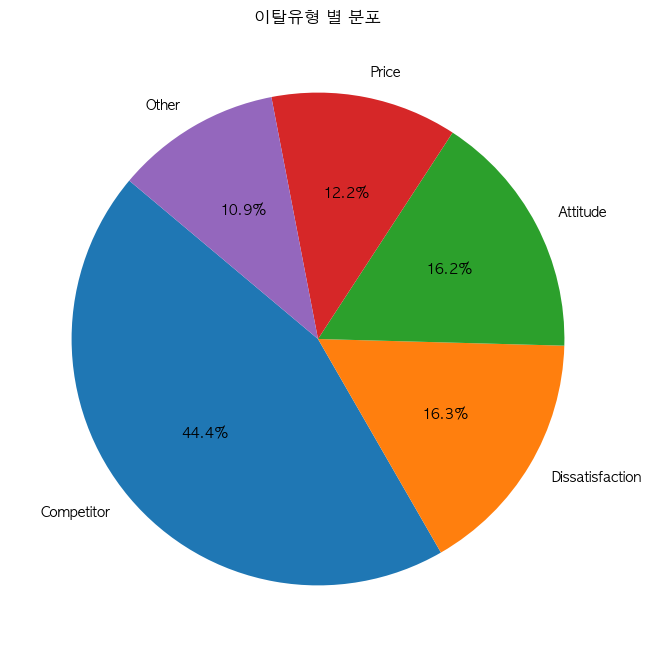

In [8]:
import matplotlib as mpl
mpl.rc('font', family = 'AppleGothic')
import matplotlib.pyplot as plt

# '이탈유형' 열의 값별 빈도 계산
value_counts = df1['이탈유형'].value_counts()

# 파이 차트 시각화
plt.figure(figsize=(8, 8)) # 차트의 크기 조절
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('이탈유형 별 분포') # 차트 제목
plt.show()

In [9]:
cond1 = (df1['이탈유형']=='Competitor')
p1 = df1.loc[cond1]
p1['이탈사유'].value_counts(normalize=True)

이탈사유
Competitor offered more d    0.212313
Competitor offered higher    0.198411
Competitor made better of    0.142674
Competitor had better dev    0.138510
Attitude of support perso    0.061055
Attitude of service provi    0.048434
Network reliability          0.031520
Service dissatisfaction      0.026587
Lack of self-service on W    0.022551
Extra data charges           0.021718
Product dissatisfaction      0.015504
Poor expertise of phone s    0.014735
Lack of affordable downlo    0.014671
Don't know                   0.012557
Price too high               0.012237
Moved                        0.009674
Long distance charges        0.008777
Poor expertise of online     0.004677
Limited range of services    0.003395
Name: proportion, dtype: float64

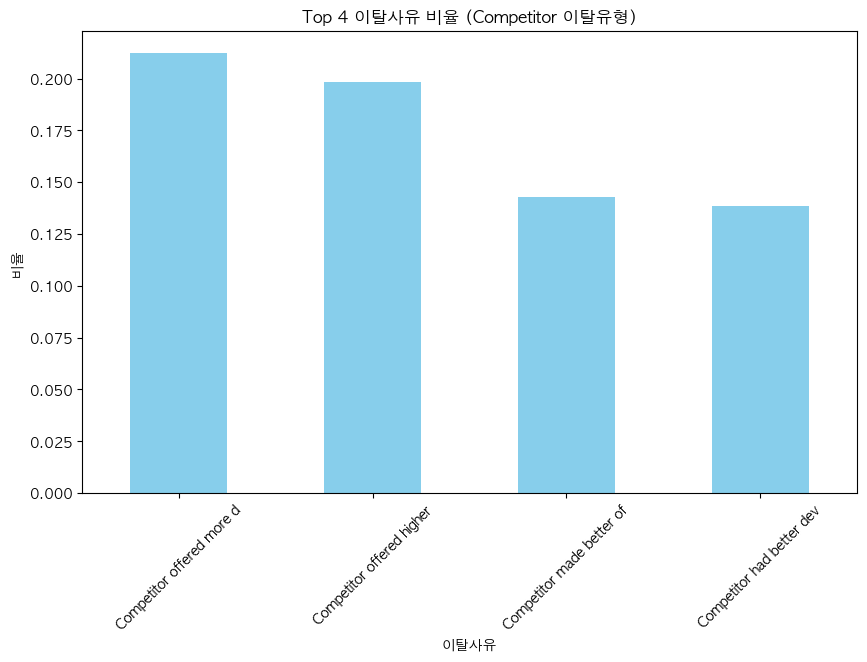

In [11]:
import matplotlib.pyplot as plt

# '이탈사유'의 값별 빈도를 정규화하여 계산
reason_counts_normalized = p1['이탈사유'].value_counts(normalize=True).head(4)

# 상위 4개 이탈사유 시각화
plt.figure(figsize=(10, 6)) # 차트의 크기 조절
reason_counts_normalized.plot(kind='bar', color='skyblue')
plt.title('Top 4 이탈사유 비율 (Competitor 이탈유형)') # 차트 제목
plt.xlabel('이탈사유') # x축 라벨
plt.ylabel('비율') # y축 라벨
plt.xticks(rotation=45) # x축 라벨 회전
plt.show()

In [20]:
cond3 = (df_customer['부양자수']!=0)
len(df_customer.loc[cond3])

1453

In [25]:
df_data = df_customer[df_customer['데이터무제한']=='Yes']

In [ ]:
# 데이터가 무제한인 고객들의 연령대별 이탈여부
df_data.pivot_table(index='연령대', columns='고객이탈여부', aggfunc='size').reset_index()

In [4]:
def func2(age):
    if age < 30:
        return '20대'
    elif 30 <= age < 40:
        return '30대'
    elif 40 <= age < 50:
        return '40대'
    elif 50 <= age < 60:
        return '50대'
    elif 60 <= age < 70:
        return '60대'
    else:
        return '70대 이상'

df_customer['연령대'] = df_customer['연령'].apply(func2)

In [5]:
def func(row):
    if row!=0:
        return '미사용'
    else:
        return '사용'
    
df_customer['로밍사용여부'] = df_customer['로밍사용료'].apply(func)

In [ ]:
df_customer.pivot_table(index=['로밍사용여부','고객이탈여부'], columns='연령대',
                        aggfunc='size', fill_value=0)

In [ ]:
# 13530원...이 로밍 평균

In [ ]:
df_customer.pivot_table(index='부양자유무',columns='고객이탈여부',aggfunc='size')

In [ ]:
# 부양자 X -> 해지율
1611 / (3799+1611)

In [ ]:
# 부양자 O -> 해지율
91 / (1362 + 91)

In [27]:
df_customer

Unnamed: 0     고객ID  성별  연령 결혼여부 부양자유무  부양자수  추천횟수 영수증발급여부  과금방식  ...  \
0              0  C-10001  여성  37  Yes    No     0     2     Yes  신용카드  ...   
1              1  C-10002  남성  46   No    No     0     0      No  신용카드  ...   
2              2  C-10003  남성  50   No    No     0     0     Yes  계좌이체  ...   
3              3  C-10004  남성  78  Yes    No     0     1     Yes  계좌이체  ...   
4              4  C-10005  여성  75  Yes    No     0     3     Yes  신용카드  ...   
...          ...      ...  ..  ..  ...   ...   ...   ...     ...   ...  ...   
6858        6858  C-17039  여성  20   No    No     0     0      No  신용카드  ...   
6859        6859  C-17040  남성  40  Yes    No     0     1     Yes  계좌이체  ...   
6860        6860  C-17041  남성  22   No    No     0     0     Yes  신용카드  ...   
6861        6861  C-17042  남성  21   No    No     0     5      No  신용카드  ...   
6862        6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체  ...   

             종료일 고객이탈여부 이탈가능점수             이탈유형                     이탈사유  \
0     2022-01-01     No     65              NaN                      NaN   
1     2022-01-01     No     66              NaN                      NaN   
2     2021-02-01    Yes     71       Competitor           Price too high   
3     2021-07-01    Yes     99  Dissatisfaction  Product dissatisfaction   
4     2021-10-01    Yes     68  Dissatisfaction      Network reliability   
...          ...    ...    ...              ...                      ...   
6858  2022-01-01     No     59              NaN                      NaN   
6859  2021-01-01    Yes     68  Dissatisfaction  Product dissatisfaction   
6860  2022-01-01     No     33              NaN                      NaN   
6861  2022-01-01     No     59              NaN                      NaN   
6862  2022-01-01     No     20              NaN                      NaN   

       LTV 만족도 데이터사용료  로밍사용료   총로밍요금  
0     2205   3      0  47910  431100  
1     5414   5  11300  12090  108710  
2     4479   1      0  38080  152100  
3     3714   1      0  31410  408720  
4     3464   1      0   8360   24970  
...    ...  ..    ...    ...     ...  
6858  3161   4      0  52770  685680  
6859  5248   1      0  18310  402730  
6860  5870   5      0  21020   42040  
6861  4792   3      0   2370  160460  
6862  5639   3      0      0       0  

[6863 rows x 26 columns]

In [29]:
df_customer['종료일'].value_counts()

종료일
2022-01-01    5161
2021-10-01     235
2021-02-01     161
2021-08-01     150
2021-01-01     149
2021-06-01     149
2021-09-01     145
2021-04-01     140
2021-11-01     138
2021-07-01     118
2021-03-01     114
2021-12-01     104
2021-05-01      99
Name: count, dtype: int64

In [37]:
cond1 = (df_customer['이탈유형']=='Competitor')
df_comp = df_customer.loc[cond1]

In [38]:
# 이탈을 했는데, 경쟁사로 이탈한 사람
len(df_comp)

762

In [47]:
##### 만족도가 3인 그룹과 그렇지 않은 그룹 비교?

In [49]:
cond4 = (df_customer['만족도']==3)
df_satis = df_customer.loc[cond4]

In [52]:
df_satis3_out = df_satis[df_satis['고객이탈여부']=='Yes']
df_satis3_in = df_satis[df_satis['고객이탈여부']=='No']

In [53]:
df_satis3_out['연령대'].value_counts()

연령대
70대 이상    71
60대       69
20대       65
40대       65
30대       58
50대       56
Name: count, dtype: int64

In [55]:
df_satis3_in['연령대'].value_counts()

연령대
20대       463
40대       452
30대       428
50대       399
60대       302
70대 이상    189
Name: count, dtype: int64

In [57]:
df_customer['결혼여부'].value_counts()

결혼여부
No     3896
Yes    2967
Name: count, dtype: int64

In [68]:
df_married = df_customer[df_customer['결혼여부']=='Yes']
df_not_married = df_customer[df_customer['결혼여부']=='No']

In [59]:
df_customer.pivot_table(index='결혼여부', columns='연령대',
                       aggfunc='size')

# 20대는 결혼하지 않은 사람이 많아서, 20대의 특성이 반영될 수 있을듯
# 20대를 제외하고 볼까?
# 만약 인사이트가 나온다면, 20대를 제외한 근거가 있어야할듯
# 과금을 더 많이 하는 성향이 있는 30대 이상부터 봤다거나 .. 

연령대    20대  30대  40대  50대  60대  70대 이상
결혼여부                                  
No    1045  641  689  632  531     358
Yes    299  617  619  585  451     396

In [60]:
df_married['데이터무제한'].value_counts()

데이터무제한
Yes    2052
No      915
Name: count, dtype: int64

In [61]:
df_not_married['데이터무제한'].value_counts()

데이터무제한
Yes    2563
No     1333
Name: count, dtype: int64

In [71]:
# 20대 제외하자!
cond5 = (df_married['연령대']!= '20대')
df_married = df_married[df_married['연령대']!= '20대']
df_not_married = df_not_married[df_not_married['연령대']!= '20대']
#df_not_married = df_not_married.loc[cond5]

In [72]:
df_married['데이터무제한'].value_counts()

데이터무제한
Yes    1847
No      821
Name: count, dtype: int64

In [73]:
df_not_married['데이터무제한'].value_counts()

데이터무제한
Yes    1905
No      946
Name: count, dtype: int64

In [75]:
df_married['추천횟수'].value_counts()

# 네트워크의 차이? - 기혼자들은 가족, 친척, 동료 등 더 넓은 네트워크를 가질 수 있음
# 서비스 인식 및 가치 평가? = 미혼자들은 이동통신 서비스의 특정 측면(데이터 사용량, 가격)
# 을 더 중시할 수도... 미혼자들에게 추천 프로그램의 혜택이 그다지 매력적이지 않다?

추천횟수
1     861
3     201
7     201
5     197
2     185
9     184
4     181
10    179
6     171
8     163
0     143
11      2
Name: count, dtype: int64

In [76]:
df_not_married['추천횟수'].value_counts()

추천횟수
0     2841
1        4
10       2
8        2
3        1
6        1
Name: count, dtype: int64

In [77]:
# 두 집단의 평균 추천횟수 비교 (t-test 같은 통계적 검정)
# 혹은 비율비교 ? (카이제곱 검정)

In [ ]:
# 고객 가치 분석 ? -> 어떤 집단이 회사에 더 큰 가치를 제공하는지 분석
# 전환율 및 참여도 분석(추천이 실제 서비스 가입으로 이어지는 비율 / 서비스 사용 빈도/ 앱 내 활동 등)]

In [115]:
df_married['만족도'].mean()

3.333583208395802

In [117]:
df_not_married['만족도'].mean()

3.1788846018940724

In [101]:
print(df_married['고객이탈여부'].value_counts())
print('\n기혼 고객들의 해지율')
print((535/(2133+535))*100,'%')

고객이탈여부
No     2133
Yes     535
Name: count, dtype: int64

기혼 고객들의 해지율
20.052473763118442 %


In [102]:
print(df_not_married['고객이탈여부'].value_counts())
print('\n미혼 고객들의 해지율')
print((899/(1952+899))*100,'%')

고객이탈여부
No     1952
Yes     899
Name: count, dtype: int64

미혼 고객들의 해지율
31.532795510347245 %


In [122]:
df_married['시작일'].value_counts()
# 기혼자들 중에서는 시작일이 빠른 (장기고객이 많다)

시작일
2015-01-01    238
2015-02-01    102
2015-03-01     68
2015-05-01     63
2015-06-01     53
             ... 
2021-05-01     12
2021-07-01      9
2021-06-01      8
2021-04-01      7
2021-09-01      3
Name: count, Length: 81, dtype: int64

In [123]:
df_not_married['시작일'].value_counts()

시작일
2020-12-01    213
2020-11-01     98
2020-10-01     94
2020-09-01     76
2021-01-01     72
             ... 
2016-06-01     14
2016-01-01     14
2016-03-01     14
2015-12-01      9
2021-09-01      5
Name: count, Length: 82, dtype: int64

In [126]:
df_married['데이터사용량'].mean()

16.507871064467768

In [127]:
df_not_married['데이터사용량'].mean()

14.168361978253245

In [128]:
#### 알뜰폰 부상 시기에 나간 고객들에 대한 분석?

In [130]:
df_customer['종료일']='2021-10-01'

0       2022-01-01
1       2022-01-01
2       2021-02-01
3       2021-07-01
4       2021-10-01
           ...    
6858    2022-01-01
6859    2021-01-01
6860    2022-01-01
6861    2022-01-01
6862    2022-01-01
Name: 종료일, Length: 6863, dtype: object

In [132]:
df_customer['종료일'].value_counts()

종료일
2022-01-01    5161
2021-10-01     235
2021-02-01     161
2021-08-01     150
2021-01-01     149
2021-06-01     149
2021-09-01     145
2021-04-01     140
2021-11-01     138
2021-07-01     118
2021-03-01     114
2021-12-01     104
2021-05-01      99
Name: count, dtype: int64

In [158]:
# 해지고객 세그먼트 : (2021 10, 11, 12월이후) vs (이전)
# 날짜형으로 변환
df_customer['종료일_dt'] = pd.to_datetime(df_customer['종료일'])

# 2021년 10월 이후인 그룹과 이전인 그룹으로 나누기
df_after_october = df_customer[(df_customer['종료일_dt'].dt.year == 2021) & (df_customer['종료일_dt'].dt.month >= 10)]
df_before_october = df_customer[(df_customer['종료일_dt'].dt.year == 2021) & (df_customer['종료일_dt'].dt.month < 10)]

-------

In [140]:
df_customer.pivot_table(index='고객이탈여부',
                       columns='결혼여부', aggfunc='size')
# 결혼을 하지 않은 사람들의 이탈이 매우 많다

결혼여부      No   Yes
고객이탈여부            
No      2776  2385
Yes     1120   582

In [141]:
# 해지를 한 사람들 중 미혼인 사람들의 해지율이 기혼인 사람들의 해지율보다 2배 높음

In [ ]:
# 미혼자들이 해지하는 이유가 뭘까?
# => 요금제 서비스 사용 패턴

In [145]:
df_married['이탈유형'].value_counts()
print('기혼자들이 경쟁사로 이탈')
print(237/(104+83+58+53))

기혼자들이 경쟁사로 이탈
0.7953020134228188


In [146]:
df_not_married['이탈유형'].value_counts()
print(397/(159+131+114+98))

0.7908366533864541


In [147]:
df_customer

Unnamed: 0     고객ID  성별  연령 결혼여부 부양자유무  부양자수  추천횟수 영수증발급여부  과금방식  ...  \
0              0  C-10001  여성  37  Yes    No     0     2     Yes  신용카드  ...   
1              1  C-10002  남성  46   No    No     0     0      No  신용카드  ...   
2              2  C-10003  남성  50   No    No     0     0     Yes  계좌이체  ...   
3              3  C-10004  남성  78  Yes    No     0     1     Yes  계좌이체  ...   
4              4  C-10005  여성  75  Yes    No     0     3     Yes  신용카드  ...   
...          ...      ...  ..  ..  ...   ...   ...   ...     ...   ...  ...   
6858        6858  C-17039  여성  20   No    No     0     0      No  신용카드  ...   
6859        6859  C-17040  남성  40  Yes    No     0     1     Yes  계좌이체  ...   
6860        6860  C-17041  남성  22   No    No     0     0     Yes  신용카드  ...   
6861        6861  C-17042  남성  21   No    No     0     5      No  신용카드  ...   
6862        6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체  ...   

     이탈가능점수             이탈유형                     이탈사유   LTV  만족도 데이터사용료  \
0        65              NaN                      NaN  2205    3      0   
1        66              NaN                      NaN  5414    5  11300   
2        71       Competitor           Price too high  4479    1      0   
3        99  Dissatisfaction  Product dissatisfaction  3714    1      0   
4        68  Dissatisfaction      Network reliability  3464    1      0   
...     ...              ...                      ...   ...  ...    ...   
6858     59              NaN                      NaN  3161    4      0   
6859     68  Dissatisfaction  Product dissatisfaction  5248    1      0   
6860     33              NaN                      NaN  5870    5      0   
6861     59              NaN                      NaN  4792    3      0   
6862     20              NaN                      NaN  5639    3      0   

      로밍사용료   총로밍요금     연령대     종료일_dt  
0     47910  431100     30대 2022-01-01  
1     12090  108710     40대 2022-01-01  
2     38080  152100     50대 2021-02-01  
3     31410  408720  70대 이상 2021-07-01  
4      8360   24970  70대 이상 2021-10-01  
...     ...     ...     ...        ...  
6858  52770  685680     20대 2022-01-01  
6859  18310  402730     40대 2021-01-01  
6860  21020   42040     20대 2022-01-01  
6861   2370  160460     20대 2022-01-01  
6862      0       0     30대 2022-01-01  

[6863 rows x 28 columns]

In [150]:
df_after_october['만족도'].mean()

1.7148846960167714

In [151]:
df_before_october['만족도'].mean()

1.7330612244897958

In [154]:
df_after_october['시작일'].value_counts().head(5)

시작일
2021-08-01    39
2021-10-01    36
2021-07-01    32
2021-06-01    20
2021-03-01    18
Name: count, dtype: int64

In [155]:
df_before_october['시작일'].value_counts().head(5)

시작일
2021-01-01    88
2020-12-01    73
2021-05-01    56
2021-03-01    53
2020-11-01    42
Name: count, dtype: int64

In [7]:
# 날짜형으로 변환
df_customer['시작일'] = pd.to_datetime(df_customer['시작일'])
df_customer['종료일'] = pd.to_datetime(df_customer['종료일'])

# '유지일' 파생 변수 생성
df_customer['유지일'] = (df_customer['종료일'] - df_customer['시작일']).dt.days

In [161]:
df_after_october['유지일'].mean()

645.9685534591194

In [162]:
df_before_october['유지일'].mean()

579.4293877551021

In [163]:
df_customer['시작일'].value_counts()

시작일
2015-01-01    356
2020-12-01    320
2020-11-01    166
2015-02-01    164
2020-10-01    156
             ... 
2021-02-01     51
2021-06-01     38
2021-04-01     37
2021-10-01     36
2021-09-01     10
Name: count, Length: 82, dtype: int64

In [164]:
df_charge

Unnamed: 0     고객ID         과금일    과금액
0                0  C-10001  2020-04-01  84600
1                1  C-10001  2020-05-01  83500
2                2  C-10001  2020-06-01  85700
3                3  C-10001  2020-07-01  83500
4                4  C-10001  2020-08-01  84600
...            ...      ...         ...    ...
291329      291329  C-17043  2021-08-01  68300
291330      291330  C-17043  2021-09-01  69500
291331      291331  C-17043  2021-10-01  68300
291332      291332  C-17043  2021-11-01  69500
291333      291333  C-17043  2021-12-01  69500

[291334 rows x 4 columns]

In [167]:
df_customer['유지일'].value_counts()

유지일
2557    356
396     244
31      214
2526    164
426     133
       ... 
946       1
1311      1
1584      1
881       1
516       1
Name: count, Length: 234, dtype: int64

In [168]:
# 아니면 2021년 10월에 나간 애들이 있고 들어온 애들이 있는데
# 얘네들의 소비패턴을 보면 어떨까

In [170]:
df1

Unnamed: 0_x     고객ID  성별  연령 결혼여부 부양자유무  부양자수  추천횟수 영수증발급여부  과금방식  \
0                  0  C-10001  여성  37  Yes    No     0     2     Yes  신용카드   
1                  0  C-10001  여성  37  Yes    No     0     2     Yes  신용카드   
2                  0  C-10001  여성  37  Yes    No     0     2     Yes  신용카드   
3                  0  C-10001  여성  37  Yes    No     0     2     Yes  신용카드   
4                  0  C-10001  여성  37  Yes    No     0     2     Yes  신용카드   
...              ...      ...  ..  ..  ...   ...   ...   ...     ...   ...   
291329          6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체   
291330          6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체   
291331          6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체   
291332          6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체   
291333          6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체   

        ... 만족도 데이터사용료  로밍사용료   총로밍요금  연령대     종료일_dt   유지일 Unnamed: 0_y  \
0       ...   3      0  47910  431100  30대 2022-01-01   640            0   
1       ...   3      0  47910  431100  30대 2022-01-01   640            1   
2       ...   3      0  47910  431100  30대 2022-01-01   640            2   
3       ...   3      0  47910  431100  30대 2022-01-01   640            3   
4       ...   3      0  47910  431100  30대 2022-01-01   640            4   
...     ...  ..    ...    ...     ...  ...        ...   ...          ...   
291329  ...   3      0      0       0  30대 2022-01-01  2284       291329   
291330  ...   3      0      0       0  30대 2022-01-01  2284       291330   
291331  ...   3      0      0       0  30대 2022-01-01  2284       291331   
291332  ...   3      0      0       0  30대 2022-01-01  2284       291332   
291333  ...   3      0      0       0  30대 2022-01-01  2284       291333   

               과금일    과금액  
0       2020-04-01  84600  
1       2020-05-01  83500  
2       2020-06-01  85700  
3       2020-07-01  83500  
4       2020-08-01  84600  
...            ...    ...  
291329  2021-08-01  68300  
291330  2021-09-01  69500  
291331  2021-10-01  68300  
291332  2021-11-01  69500  
291333  2021-12-01  69500  

[291334 rows x 32 columns]

In [1]:
# 아니면 추천횟수 별로 유지일을 보는건 어떨쥐

In [9]:
df_customer[df_customer['유지일']>=1285]['추천횟수'].value_counts()
# 장기고객이라고 추천횟수가 많은 건 아니네..... 뭐지 

추천횟수
0     1224
1      524
5      182
7      180
9      179
3      165
4      165
2      163
10     163
6      146
8      138
11       2
Name: count, dtype: int64

In [21]:
out_10 = df_customer[df_customer['종료일']=='2021-10-01']
in_10 = df_customer[df_customer['시작일']=='2021-10-01']

In [10]:
# 각 고객별로 과금 횟수와 총 과금액을 계산하여 파생 변수로 추가
customer_summary = df1.groupby('고객ID').agg({'과금액': ['sum', 'count']}).reset_index()
customer_summary.columns = ['고객ID', '총과금액', '과금횟수']

# 평균 과금액 계산
customer_summary['평균과금액'] = customer_summary['총과금액'] / customer_summary['과금횟수']

In [15]:
customer_summary

고객ID     총과금액  과금횟수          평균과금액
0     C-10001  1755400    21   83590.476190
1     C-10002  1447500    21   68928.571429
2     C-10003   490900     5   98180.000000
3     C-10004  1578400    14  112742.857143
4     C-10005   378000     4   94500.000000
...       ...      ...   ...            ...
6858  C-17039  1610700    25   64428.000000
6859  C-17040  2343500    23  101891.304348
6860  C-17041   792400    14   56600.000000
6861  C-17042  6328500    79   80107.594937
6862  C-17043  5196100    75   69281.333333

[6863 rows x 4 columns]

-------

In [11]:
# df_customer에 customer_summary를 고객ID를 기준으로 병합
df2 = pd.merge(df_customer, customer_summary, on='고객ID', how='left')

In [17]:
df2

Unnamed: 0     고객ID  성별  연령 결혼여부 부양자유무  부양자수  추천횟수 영수증발급여부  과금방식  ...  \
0              0  C-10001  여성  37  Yes    No     0     2     Yes  신용카드  ...   
1              1  C-10002  남성  46   No    No     0     0      No  신용카드  ...   
2              2  C-10003  남성  50   No    No     0     0     Yes  계좌이체  ...   
3              3  C-10004  남성  78  Yes    No     0     1     Yes  계좌이체  ...   
4              4  C-10005  여성  75  Yes    No     0     3     Yes  신용카드  ...   
...          ...      ...  ..  ..  ...   ...   ...   ...     ...   ...  ...   
6858        6858  C-17039  여성  20   No    No     0     0      No  신용카드  ...   
6859        6859  C-17040  남성  40  Yes    No     0     1     Yes  계좌이체  ...   
6860        6860  C-17041  남성  22   No    No     0     0     Yes  신용카드  ...   
6861        6861  C-17042  남성  21   No    No     0     5      No  신용카드  ...   
6862        6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체  ...   

                 이탈유형                     이탈사유   LTV 만족도  데이터사용료  로밍사용료  \
0                 NaN                      NaN  2205   3       0  47910   
1                 NaN                      NaN  5414   5   11300  12090   
2          Competitor           Price too high  4479   1       0  38080   
3     Dissatisfaction  Product dissatisfaction  3714   1       0  31410   
4     Dissatisfaction      Network reliability  3464   1       0   8360   
...               ...                      ...   ...  ..     ...    ...   
6858              NaN                      NaN  3161   4       0  52770   
6859  Dissatisfaction  Product dissatisfaction  5248   1       0  18310   
6860              NaN                      NaN  5870   5       0  21020   
6861              NaN                      NaN  4792   3       0   2370   
6862              NaN                      NaN  5639   3       0      0   

       총로밍요금     총과금액  과금횟수          평균과금액  
0     431100  1755400    21   83590.476190  
1     108710  1447500    21   68928.571429  
2     152100   490900     5   98180.000000  
3     408720  1578400    14  112742.857143  
4      24970   378000     4   94500.000000  
...      ...      ...   ...            ...  
6858  685680  1610700    25   64428.000000  
6859  402730  2343500    23  101891.304348  
6860   42040   792400    14   56600.000000  
6861  160460  6328500    79   80107.594937  
6862       0  5196100    75   69281.333333  

[6863 rows x 29 columns]

-----

# 기혼고객과 미혼고객

In [12]:
def func2(age):
    if age < 30:
        return '20대'
    elif 30 <= age < 40:
        return '30대'
    elif 40 <= age < 50:
        return '40대'
    elif 50 <= age < 60:
        return '50대'
    elif 60 <= age < 70:
        return '60대'
    else:
        return '70대 이상'

df2['연령대'] = df2['연령'].apply(func2)

In [13]:
# 날짜형으로 변환
df2['시작일'] = pd.to_datetime(df2['시작일'])
df2['종료일'] = pd.to_datetime(df2['종료일'])

# '유지일' 파생 변수 생성
df2['유지일'] = (df2['종료일'] - df2['시작일']).dt.days

In [199]:
df2[df2['결혼여부']=='Yes']['추천횟수'].value_counts()
df_married = df2[df2['결혼여부']=='Yes']

In [200]:
df2[df2['결혼여부']=='No']['추천횟수'].value_counts()
df_notmarried = df2[df2['결혼여부']=='No']

In [75]:
# 기혼과 미혼 나눴을 때
# 기혼 -> 추천횟수가 0보다 큰 애들 특성 분석
# 미혼 -> 추천횟수가 0인 애들 특성 분석

# 아님 20대의 특성이 커진 것 아닐까

In [77]:
df_married[df_married['추천횟수']>0]['연령대'].value_counts()

연령대
40대       590
30대       577
50대       557
60대       431
70대 이상    370
20대       283
Name: count, dtype: int64

In [78]:
df_notmarried[df_notmarried['추천횟수']==0]['연령대'].value_counts()

연령대
40대       689
20대       682
50대       632
30대       631
60대       531
70대 이상    358
Name: count, dtype: int64

In [84]:
df_married[df_married['추천횟수']>0]['고객이탈여부'].value_counts()
print('추천을 한 번이라도 한 기혼 고객들의 이탈률')
print(543/2265)

추천을 한 번이라도 한 기혼 고객들의 이탈률
0.23973509933774834


In [83]:
df_notmarried[df_notmarried['추천횟수']==0]['고객이탈여부'].value_counts()
print('추천을 한 번도 하지 않은 미혼 고객들의 이탈률')
print(1069/2454)

추천을 한 번도 하지 않은 미혼 고객들의 이탈률
0.43561532192339036


In [87]:
df_married['고객이탈여부'].value_counts()
print('기혼 고객들의 이탈률')
print(582/2385)

기혼 고객들의 이탈률
0.2440251572327044


In [91]:
df_notmarried['고객이탈여부'].value_counts()
print('미혼 고객들의 이탈률')
print(1120/2776)

미혼 고객들의 이탈률
0.4034582132564842


In [92]:
df2.pivot_table(index='고객이탈여부', columns='연령대', aggfunc='size', fill_value=0)

연령대      20대  30대   40대  50대  60대  70대 이상
고객이탈여부                                   
No      1076  970  1022  943  696     454
Yes      268  288   286  274  286     300

In [94]:
### 엮을 수 있는 것
# 기혼과 미혼으로 나눈 상품
# 기혼고객과 미혼 고객 중 과금 성향이 더 높은 사람들은 누구일까
# 그럼 기혼고객을 잡아야할까 미혼고객을 잡아야할까

In [98]:
df_married.pivot_table(index='연령대', values='평균과금액', aggfunc='mean')

평균과금액
연령대                 
20대     78159.630715
30대     77723.304338
40대     74240.480869
50대     77727.929674
60대     84499.304939
70대 이상  98066.131262

In [99]:
df_notmarried.pivot_table(index='연령대', values='평균과금액', aggfunc='mean')

평균과금액
연령대                 
20대     71933.667776
30대     69812.404342
40대     69044.789802
50대     70676.245297
60대     76661.920530
70대 이상  90344.095142

In [114]:
print('기혼고객들의 평균과금액의 평균')
print(df_married['평균과금액'].mean())
print('기혼고객들의 과금횟수의 평균')
print(df_married['과금횟수'].mean())
print('기혼고객들의 평균과금액평균x과금횟수평균')
print(80786.67994079618*52.32490731378497)

기혼고객들의 평균과금액의 평균
80786.67994079618
기혼고객들의 과금횟수의 평균
52.32490731378497
기혼고객들의 평균과금액평균x과금횟수평균
4227155.540090571


In [115]:
print('미혼고객들의 평균과금액의 평균')
print(df_notmarried['평균과금액'].mean())
print('미혼고객들의 과금횟수의 평균')
print(df_notmarried['과금횟수'].mean())
print('미혼고객들의 평균과금액평균x과금횟수평균')
print(73205.94124048432*34.92967145790554)

미혼고객들의 평균과금액의 평균
73205.94124048432
미혼고객들의 과금횟수의 평균
34.92967145790554
미혼고객들의 평균과금액평균x과금횟수평균
2557059.476296855


In [96]:
df_notmarried['평균과금액'].mean()

73205.94124048432

In [100]:
# 기혼인 고객들의 과금 성향이 평균적으로 7000원 정도 높다 -> 유의미할까?..

In [101]:
# 횟수에 차이가 있지 않을까?!

In [102]:
df_married.pivot_table(index='연령대', values=['평균과금액','과금횟수'], aggfunc='mean')

과금횟수         평균과금액
연령대                            
20대     52.073579  78159.630715
30대     51.654781  77723.304338
40대     54.268174  74240.480869
50대     53.124786  77727.929674
60대     51.643016  84499.304939
70대 이상  50.116162  98066.131262

In [103]:
df_notmarried.pivot_table(index='연령대', values=['평균과금액','과금횟수'], aggfunc='mean')

과금횟수         평균과금액
연령대                            
20대     40.380861  71933.667776
30대     32.681747  69812.404342
40대     32.566038  69044.789802
50대     32.987342  70676.245297
60대     34.045198  76661.920530
70대 이상  32.332402  90344.095142

In [120]:
# 서비스와는 연관이 있을까?
df_married.columns

Index(['Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '추천횟수',
       '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량',
       '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유', 'LTV', '만족도',
       '데이터사용료', '로밍사용료', '총로밍요금', '총과금액', '과금횟수', '평균과금액', '연령대'],
      dtype='object')

In [124]:
df_married['부양자유무'].value_counts()

부양자유무
No     1822
Yes    1145
Name: count, dtype: int64

In [127]:
df_notmarried['부양자유무'].value_counts()

부양자유무
No     3588
Yes     308
Name: count, dtype: int64

In [125]:
df_married.pivot_table(index='연령대', columns='부양자유무',
                       aggfunc='size', fill_value=0)

부양자유무    No  Yes
연령대             
20대     169  130
30대     338  279
40대     325  294
50대     337  248
60대     303  148
70대 이상  350   46

In [126]:
df_notmarried.pivot_table(index='연령대', columns='부양자유무',
                       aggfunc='size', fill_value=0)

부양자유무    No  Yes
연령대             
20대     963   82
30대     586   55
40대     622   67
50대     572   60
60대     498   33
70대 이상  347   11

In [148]:
print('기혼 고객들의 서비스 가입률')
print(df_married['보안서비스'].value_counts())
print(f'보안서비스 가입률 {(1047/(1920+1047))*100}%')
print('\n')
print(df_married['백업서비스'].value_counts())
print(f'백업서비스 가입률 {(1248/(1719+1248))*100}%')
print('\n')
print(df_married['기술지원서비스'].value_counts())
print(f'기술지원서비스 가입률 {(1040/(1927+1040))*100}%')

기혼 고객들의 서비스 가입률
보안서비스
No     1920
Yes    1047
Name: count, dtype: int64
보안서비스 가입률 35.28816986855409%


백업서비스
No     1719
Yes    1248
Name: count, dtype: int64
백업서비스 가입률 42.06268958543984%


기술지원서비스
No     1927
Yes    1040
Name: count, dtype: int64
기술지원서비스 가입률 35.052241321199865%


In [149]:
print('미혼 고객들의 서비스 가입률')
print(df_notmarried['보안서비스'].value_counts())
print(f'보안서비스 가입률 {(961/(2935+961))*100}%')
print('\n')
print(df_notmarried['백업서비스'].value_counts())
print(f'백업서비스 가입률 {(1158/(1158+2738))*100}%')
print('\n')
print(df_notmarried['기술지원서비스'].value_counts())
print(f'기술지원서비스 가입률 {(995/(2901+995))*100}%')

미혼 고객들의 서비스 가입률
보안서비스
No     2935
Yes     961
Name: count, dtype: int64
보안서비스 가입률 24.666324435318277%


백업서비스
No     2738
Yes    1158
Name: count, dtype: int64
백업서비스 가입률 29.722792607802873%


기술지원서비스
No     2901
Yes     995
Name: count, dtype: int64
기술지원서비스 가입률 25.539014373716633%


In [150]:
df2.columns

Index(['Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '추천횟수',
       '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량',
       '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유', 'LTV', '만족도',
       '데이터사용료', '로밍사용료', '총로밍요금', '총과금액', '과금횟수', '평균과금액', '연령대'],
      dtype='object')

In [153]:
df_married['로밍사용료'].mean()

26346.215032018874

In [154]:
df_notmarried['로밍사용료'].mean()

25677.00975359343

In [155]:
df_married['총로밍요금'].mean()

1130090.2494101787

In [156]:
df_notmarried['총로밍요금'].mean()

667471.0087268994

In [164]:
print('기혼고객들의 평균 유지일')
df_married['유지일'].mean()

기혼고객들의 평균 유지일


1587.3340074148973

In [165]:
print('미혼고객들의 평균 유지일')
df_notmarried['유지일'].mean()

미혼고객들의 평균 유지일


1054.998203285421

In [166]:
df2.columns

Index(['Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '추천횟수',
       '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량',
       '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유', 'LTV', '만족도',
       '데이터사용료', '로밍사용료', '총로밍요금', '총과금액', '과금횟수', '평균과금액', '연령대', '유지일'],
      dtype='object')

In [170]:
print('기혼 고객들의 추천횟수')
df_married['추천횟수'].value_counts()

기혼 고객들의 추천횟수


추천횟수
1     957
5     220
7     220
3     218
9     215
4     206
2     204
10    195
6     190
8     181
0     159
11      2
Name: count, dtype: int64

In [169]:
print('미혼 고객들의 추천횟수')
df_notmarried['추천횟수'].value_counts()

미혼 고객들의 추천횟수


추천횟수
0     3523
1      101
5       41
3       35
8       31
2       30
6       29
10      28
7       28
4       27
9       23
Name: count, dtype: int64

In [171]:
df2.columns

Index(['Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '추천횟수',
       '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량',
       '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유', 'LTV', '만족도',
       '데이터사용료', '로밍사용료', '총로밍요금', '총과금액', '과금횟수', '평균과금액', '연령대', '유지일'],
      dtype='object')

In [173]:
df_married['데이터사용량'].mean()

19.215032018874282

In [174]:
df_notmarried['데이터사용량'].mean()

21.49152977412731

In [177]:
print(df_married['데이터무제한'].value_counts())
print(915/2052)

데이터무제한
Yes    2052
No      915
Name: count, dtype: int64
0.44590643274853803


In [179]:
print(df_notmarried['데이터무제한'].value_counts())
print(1333/2563)

데이터무제한
Yes    2563
No     1333
Name: count, dtype: int64
0.5200936402653141


In [182]:
df_married['이탈가능점수'].mean()

56.348837209302324

In [181]:
df_notmarried['이탈가능점수'].mean()

59.49229979466119

In [183]:
df2['이탈가능점수'].mean()

58.13332361940842

In [185]:
df_married['만족도'].mean()

3.340074148972026

In [186]:
df_notmarried['만족도'].mean()

3.2312628336755647

In [187]:
df2['만족도'].mean()

3.2783039487104766

In [190]:
married = len(df_married)
notmarried = len(df_notmarried)

In [192]:
print(married/(married+notmarried))
print(notmarried/(married+notmarried))

0.4323182281800962
0.5676817718199039


In [193]:
len(df_customer)

6863

In [204]:
from scipy.stats import chi2_contingency

### 결혼여부에 따른 이탈여부 가설검정

# 귀무가설 : 결혼여부와 이탈여부는 독립적이다.
# 대립가설 : 결혼여부와 이탈여부는 독립적이지 않다.
cross_table = pd.crosstab(df2['결혼여부'], df2['고객이탈여부'])
chi2_contingency(cross_table)[1]
# P.value < 0.05 / 대립가설 채택 / 결혼여부와 이탈여부는 독립적이지 않다.

5.1517190644471296e-18

In [206]:
df_married.columns

Index(['Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '추천횟수',
       '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량',
       '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유', 'LTV', '만족도',
       '데이터사용료', '로밍사용료', '총로밍요금', '총과금액', '과금횟수', '평균과금액', '연령대', '유지일'],
      dtype='object')

In [207]:
df_married_out = df_married[df_married['고객이탈여부']=='Yes']
df_notmarried_out = df_notmarried[df_notmarried['고객이탈여부']=='Yes']

In [208]:
df_married_out['총과금액'].sum()

1727741400

In [209]:
df_notmarried_out['총과금액'].sum()

1780606800

In [210]:
df_notmarried_out

Unnamed: 0     고객ID  성별  연령 결혼여부 부양자유무  부양자수  추천횟수 영수증발급여부  과금방식  ...  \
2              2  C-10003  남성  50   No    No     0     0     Yes  계좌이체  ...   
18            18  C-10019  남성  79   No    No     0     0      No  신용카드  ...   
19            19  C-10020  남성  67   No    No     0     0     Yes  계좌이체  ...   
39            39  C-10041  남성  69   No    No     0     0     Yes  계좌이체  ...   
52            52  C-10054  남성  51   No    No     0     0     Yes  신용카드  ...   
...          ...      ...  ..  ..  ...   ...   ...   ...     ...   ...  ...   
6832        6832  C-17013  남성  65   No    No     0     0     Yes  계좌이체  ...   
6840        6840  C-17021  남성  79   No    No     0     0     Yes  계좌이체  ...   
6843        6843  C-17024  남성  73   No    No     0     0     Yes  계좌이체  ...   
6856        6856  C-17037  여성  53   No    No     0     0     Yes  신용카드  ...   
6857        6857  C-17038  여성  36   No    No     0     0      No  계좌이체  ...   

       LTV 만족도 데이터사용료  로밍사용료    총로밍요금     총과금액 과금횟수          평균과금액     연령대  \
2     4479   1      0  38080   152100   490900    5   98180.000000     50대   
18    2654   1      0  12090   542630  3363200   46   73113.043478  70대 이상   
19    5437   3      0      0        0    55600    2   27800.000000     60대   
39    3475   2      0  49720    99440   174500    3   58166.666667     60대   
52    2832   1      0  42600  1703590  5015100   41  122319.512195     50대   
...    ...  ..    ...    ...      ...      ...  ...            ...     ...   
6832  4616   1      0  32880   493470  1414200   16   88387.500000     60대   
6840  4317   1      0  47800  1003100  2491600   22  113254.545455  70대 이상   
6843  3723   1      0  11300   102150   971900   10   97190.000000  70대 이상   
6856  5773   1      0  47570    47570   155100    2   77550.000000     50대   
6857  5822   1      0   2260     9040   118300    5   23660.000000     30대   

       유지일  
2      123  
18    1371  
19      31  
39      61  
52    1218  
...    ...  
6832   457  
6840   641  
6843   274  
6856    31  
6857   121  

[1120 rows x 31 columns]

In [211]:
# 알뜰폰 이용자 수가 20대가 25%

In [213]:
df_married_out.columns

Index(['Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '추천횟수',
       '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량',
       '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유', 'LTV', '만족도',
       '데이터사용료', '로밍사용료', '총로밍요금', '총과금액', '과금횟수', '평균과금액', '연령대', '유지일'],
      dtype='object')

In [221]:
df_married_out['유지일'].mean()

847.6116838487973

In [222]:
df_notmarried_out['유지일'].mean()

468.4089285714286

In [217]:
print('해지한 기혼고객들의 평균과금액의 평균')
print(df_married_out['평균과금액'].mean())
print('해지한 기혼고객들의 과금횟수의 평균')
print(df_married_out['과금횟수'].mean())
print('해지한 기혼고객들의 평균과금액평균x과금횟수평균')
print(80786.67994079618*52.32490731378497)

해지한 기혼고객들의 평균과금액의 평균
95535.92324343318
해지한 기혼고객들의 과금횟수의 평균
28.84192439862543
해지한 기혼고객들의 평균과금액평균x과금횟수평균
4227155.540090571


In [218]:
print('해지한 미혼고객들의 평균과금액의 평균')
print(df_notmarried_out['평균과금액'].mean())
print('해지한 미혼고객들의 과금횟수의 평균')
print(df_notmarried_out['과금횟수'].mean())
print('해지한 기혼고객들의 평균과금액평균x과금횟수평균')
print(80786.67994079618*52.32490731378497)

해지한 미혼고객들의 평균과금액의 평균
86437.82117167157
해지한 미혼고객들의 과금횟수의 평균
16.384821428571428
해지한 기혼고객들의 평균과금액평균x과금횟수평균
4227155.540090571


In [223]:
### 해지한 두 그룹의 CLV (장기적으로 봤을 때는?)

# 해지한 기혼 고객들의 CLV
married_out_CLV = (95535.92324343318*28.84192439862543)*847.6116838487973

# 해지한 미혼 고객들의 CLV
notmarried_out_CLV = (86437.82117167157*16.384821428571428)*468.4089285714286

In [225]:
print('해지한 기혼 고객들의 CLV')
print(married_out_CLV)
print('해지한 미혼 고객들의 CLV')
print(notmarried_out_CLV)

해지한 기혼 고객들의 CLV
2335543032.650564
해지한 미혼 고객들의 CLV
663392700.3781819


In [227]:
2335543032.650564//663392700.3781819

3.0

In [228]:
df2

Unnamed: 0     고객ID  성별  연령 결혼여부 부양자유무  부양자수  추천횟수 영수증발급여부  과금방식  ...  \
0              0  C-10001  여성  37  Yes    No     0     2     Yes  신용카드  ...   
1              1  C-10002  남성  46   No    No     0     0      No  신용카드  ...   
2              2  C-10003  남성  50   No    No     0     0     Yes  계좌이체  ...   
3              3  C-10004  남성  78  Yes    No     0     1     Yes  계좌이체  ...   
4              4  C-10005  여성  75  Yes    No     0     3     Yes  신용카드  ...   
...          ...      ...  ..  ..  ...   ...   ...   ...     ...   ...  ...   
6858        6858  C-17039  여성  20   No    No     0     0      No  신용카드  ...   
6859        6859  C-17040  남성  40  Yes    No     0     1     Yes  계좌이체  ...   
6860        6860  C-17041  남성  22   No    No     0     0     Yes  신용카드  ...   
6861        6861  C-17042  남성  21   No    No     0     5      No  신용카드  ...   
6862        6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체  ...   

       LTV 만족도 데이터사용료  로밍사용료   총로밍요금     총과금액 과금횟수          평균과금액     연령대  \
0     2205   3      0  47910  431100  1755400   21   83590.476190     30대   
1     5414   5  11300  12090  108710  1447500   21   68928.571429     40대   
2     4479   1      0  38080  152100   490900    5   98180.000000     50대   
3     3714   1      0  31410  408720  1578400   14  112742.857143  70대 이상   
4     3464   1      0   8360   24970   378000    4   94500.000000  70대 이상   
...    ...  ..    ...    ...     ...      ...  ...            ...     ...   
6858  3161   4      0  52770  685680  1610700   25   64428.000000     20대   
6859  5248   1      0  18310  402730  2343500   23  101891.304348     40대   
6860  5870   5      0  21020   42040   792400   14   56600.000000     20대   
6861  4792   3      0   2370  160460  6328500   79   80107.594937     20대   
6862  5639   3      0      0       0  5196100   75   69281.333333     30대   

       유지일  
0      640  
1      640  
2      123  
3      395  
4       92  
...    ...  
6858   762  
6859   672  
6860   426  
6861  2406  
6862  2284  

[6863 rows x 31 columns]

In [229]:
# 1인가구 ... . . . . -> 근데 얘네도 가족이 있자너... 

In [232]:
cond1 = (df2['결혼여부']=='No')
cond2 = (df2['부양자유무']=='No')

one_df = df2.loc[cond1&cond2]
notone_df = df2.loc[~(cond1&cond2)]

In [233]:
one_df.columns

Index(['Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '추천횟수',
       '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량',
       '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유', 'LTV', '만족도',
       '데이터사용료', '로밍사용료', '총로밍요금', '총과금액', '과금횟수', '평균과금액', '연령대', '유지일'],
      dtype='object')

In [234]:
one_df['평균과금액'].mean()

74343.28612828803

In [235]:
notone_df['평균과금액'].mean()

78827.69948976232

In [236]:
one_df['과금횟수'].mean()

34.90551839464883

In [237]:
notone_df['과금횟수'].mean()

50.71541984732824

In [238]:
one_df['로밍사용료'].mean()

25797.789855072464

In [239]:
notone_df['로밍사용료'].mean()

26150.95572519084

In [240]:
one_df['유지일'].mean()

1053.8779264214047

In [241]:
notone_df['유지일'].mean()

1538.4974045801528

In [243]:
one_df['보안서비스'].value_counts()

보안서비스
No     2710
Yes     878
Name: count, dtype: int64

In [244]:
notone_df['보안서비스'].value_counts()

보안서비스
No     2145
Yes    1130
Name: count, dtype: int64

In [247]:
one_df['이탈유형'].value_counts(normalize=True)

이탈유형
Competitor         0.455390
Attitude           0.171004
Dissatisfaction    0.147770
Price              0.121747
Other              0.104089
Name: proportion, dtype: float64

In [248]:
notone_df['이탈유형'].value_counts(normalize=True)

이탈유형
Competitor         0.434505
Dissatisfaction    0.191693
Attitude           0.164537
Other              0.108626
Price              0.100639
Name: proportion, dtype: float64

In [257]:
one_df['이탈사유'].value_counts()

이탈사유
Attitude of support perso    118
Competitor offered higher    116
Competitor offered more d     97
Don't know                    83
Competitor made better of     79
Competitor had better dev     75
Attitude of service provi     74
Price too high                67
Network reliability           58
Product dissatisfaction       50
Service dissatisfaction       47
Lack of self-service on W     47
Extra data charges            34
Long distance charges         32
Moved                         28
Lack of affordable downlo     24
Limited range of services     22
Poor expertise of online      12
Poor expertise of phone s     11
Deceased                       2
Name: count, dtype: int64

In [258]:
notone_df['이탈사유'].value_counts()

이탈사유
Competitor offered higher    59
Attitude of support perso    58
Competitor offered more d    54
Don't know                   52
Attitude of service provi    46
Product dissatisfaction      45
Competitor made better of    42
Competitor had better dev    38
Network reliability          35
Lack of self-service on W    34
Service dissatisfaction      32
Price too high               25
Extra data charges           22
Moved                        21
Lack of affordable downlo    19
Limited range of services    17
Long distance charges        12
Poor expertise of phone s     8
Poor expertise of online      5
Deceased                      2
Name: count, dtype: int64

In [252]:
one_df['추천횟수'].value_counts()

추천횟수
0     3238
1       97
5       37
3       32
2       29
6       29
10      27
8       27
7       26
4       25
9       21
Name: count, dtype: int64

In [253]:
notone_df['추천횟수'].value_counts()

추천횟수
1     961
0     444
5     224
7     222
3     221
9     217
4     208
2     205
10    196
6     190
8     185
11      2
Name: count, dtype: int64

In [254]:
# 결혼을 안했는데 1인가구인 사람..?

In [255]:
len(one_df)

3588

In [256]:
len(notone_df)

3275

In [262]:
one_df['데이터무제한'].value_counts()
print('1인 가구 데이터 무제한 비율')
print(2404/(2404+1184))

1인 가구 데이터 무제한 비율
0.6700111482720178


In [260]:
print('')
notone_df['데이터무제한'].value_counts()

데이터무제한
Yes    2211
No     1064
Name: count, dtype: int64

In [ ]:
# 다른 비교군?
# 

In [1]:
df2.columns

NameError: name 'df2' is not defined

# ! 

In [3]:
df2 = pd.read_csv('kt_data.csv')

In [18]:
df2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무',
       '부양자수', '추천횟수', '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스',
       '데이터무제한', '데이터사용량', '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유',
       'LTV', '만족도', '데이터사용료', '로밍사용료', '총로밍요금', '연령대', '로밍사용여부', '유지일',
       '총과금액', '과금횟수', '평균과금액'],
      dtype='object')

In [19]:
df2['CLV'] = (df2['총과금액'] * df2['과금횟수']) * (1 / df2['평균과금액'])

In [24]:
df2[['고객ID','고객이탈여부','LTV','총과금액','평균과금액','유지일','CLV']]

고객ID 고객이탈여부   LTV     총과금액          평균과금액   유지일     CLV
0     C-10001     No  2205  1755400   83590.476190   640   441.0
1     C-10002     No  5414  1447500   68928.571429   640   441.0
2     C-10003    Yes  4479   490900   98180.000000   123    25.0
3     C-10004    Yes  3714  1578400  112742.857143   395   196.0
4     C-10005    Yes  3464   378000   94500.000000    92    16.0
...       ...    ...   ...      ...            ...   ...     ...
6858  C-17039     No  3161  1610700   64428.000000   762   625.0
6859  C-17040    Yes  5248  2343500  101891.304348   672   529.0
6860  C-17041     No  5870   792400   56600.000000   426   196.0
6861  C-17042     No  4792  6328500   80107.594937  2406  6241.0
6862  C-17043     No  5639  5196100   69281.333333  2284  5625.0

[6863 rows x 7 columns]

In [5]:
cond1 = (df2['결혼여부']=='No')
cond2 = (df2['부양자유무']=='No')

one_df = df2.loc[cond1&cond2]
notone_df = df2.loc[~(cond1&cond2)]

In [9]:
one_df['추천횟수'].value_counts()

추천횟수
0     3238
1       97
5       37
3       32
2       29
6       29
10      27
8       27
7       26
4       25
9       21
Name: count, dtype: int64

/var/folders/q9/51yx3nc91mq6crjc81y6g1wm0000gn/T/ipykernel_978/2698720697.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['추천여부'] = one_df['추천횟수'].apply(lambda x: '한 번 이상 추천한 사람' if x > 0 else '추천하지 않은 사람')


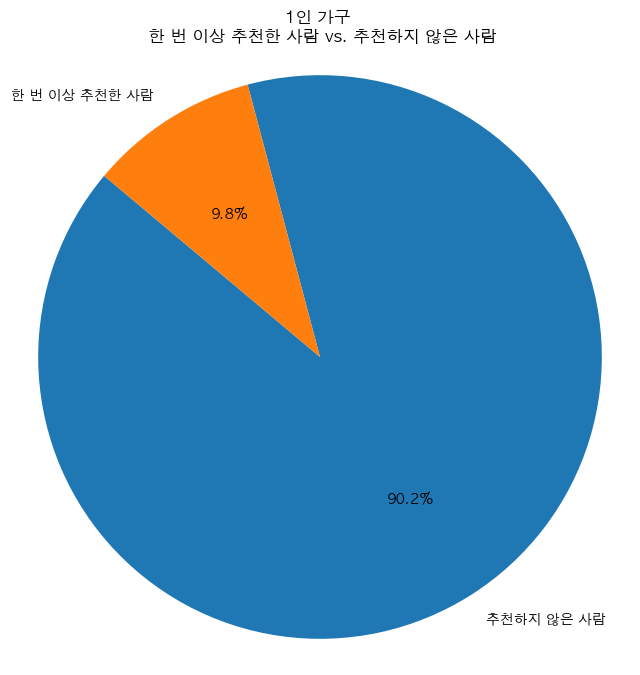

In [25]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
one_df['추천여부'] = one_df['추천횟수'].apply(lambda x: '한 번 이상 추천한 사람' if x > 0 else '추천하지 않은 사람')
recommendation_counts = one_df['추천여부'].value_counts()
# 파이차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('1인 가구 \n 한 번 이상 추천한 사람 vs. 추천하지 않은 사람')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
notone_df['추천횟수'].value_counts()

추천횟수
1     961
0     444
5     224
7     222
3     221
9     217
4     208
2     205
10    196
6     190
8     185
11      2
Name: count, dtype: int64

/var/folders/q9/51yx3nc91mq6crjc81y6g1wm0000gn/T/ipykernel_978/3621201247.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notone_df['추천여부'] = notone_df['추천횟수'].apply(lambda x: '한 번 이상 추천한 사람' if x > 0 else '추천하지 않은 사람')


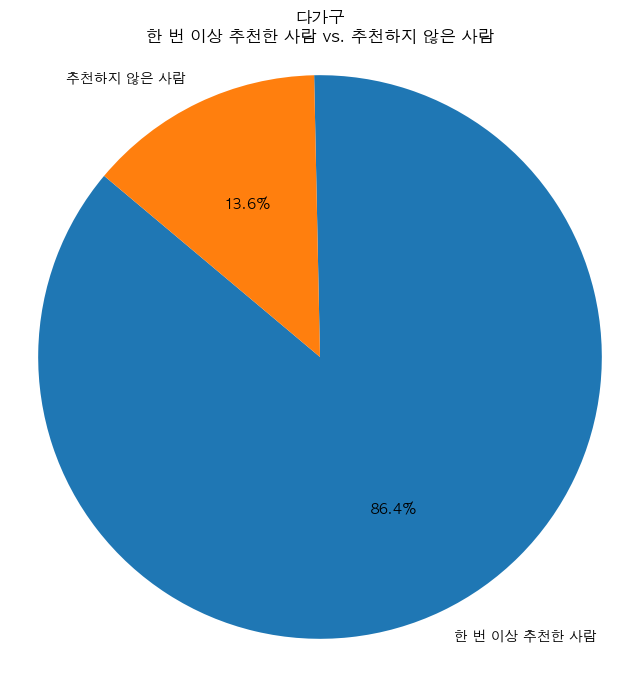

In [26]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# '추천횟수' 열에서 0 이외의 값이 있는지 확인하여 새로운 열 생성
notone_df['추천여부'] = notone_df['추천횟수'].apply(lambda x: '한 번 이상 추천한 사람' if x > 0 else '추천하지 않은 사람')

# '추천여부' 열의 값에 따라 데이터를 그룹화하고 카운트 계산
recommendation_counts_notone = notone_df['추천여부'].value_counts()

# 파이차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(recommendation_counts_notone, labels=recommendation_counts_notone.index, autopct='%1.1f%%', startangle=140)
plt.title('다가구\n한 번 이상 추천한 사람 vs. 추천하지 않은 사람')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


/var/folders/q9/51yx3nc91mq6crjc81y6g1wm0000gn/T/ipykernel_978/182559123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notone_df['추천여부'] = notone_df['추천횟수'].apply(lambda x: '한 번 이상 추천한 사람' if x > 0 else '추천하지 않은 사람')


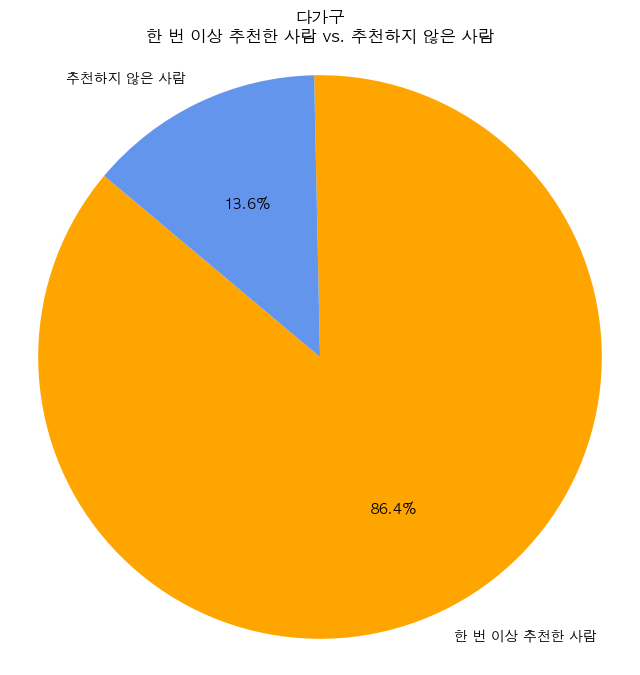

In [30]:
notone_df['추천여부'] = notone_df['추천횟수'].apply(lambda x: '한 번 이상 추천한 사람' if x > 0 else '추천하지 않은 사람')
recommendation_counts = notone_df['추천여부'].value_counts()
colors = ['#FFA500', '#6495ED']
# 파이차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('다가구\n한 번 이상 추천한 사람 vs. 추천하지 않은 사람')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/var/folders/q9/51yx3nc91mq6crjc81y6g1wm0000gn/T/ipykernel_978/2703231044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['추천여부'] = one_df['추천횟수'].apply(lambda x: '한 번 이상 추천한 사람' if x > 0 else '추천하지 않은 사람')


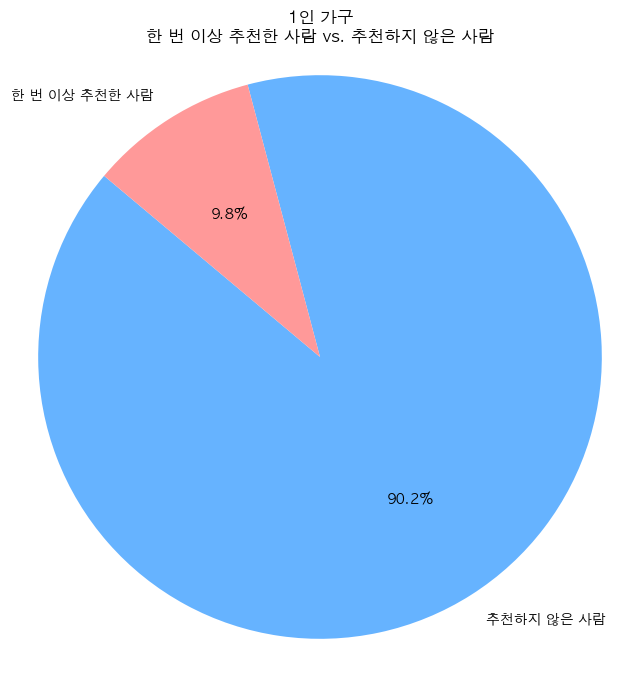

In [27]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# '추천횟수' 열에서 0 이외의 값이 있는지 확인하여 새로운 열 생성
one_df['추천여부'] = one_df['추천횟수'].apply(lambda x: '한 번 이상 추천한 사람' if x > 0 else '추천하지 않은 사람')

# '추천여부' 열의 값에 따라 데이터를 그룹화하고 카운트 계산
recommendation_counts = one_df['추천여부'].value_counts()

# 색상 설정 (추천하지 않은 사람 -> 추천한 사람)
colors = ['#66b3ff', '#ff9999']

# 파이차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('1인 가구\n한 번 이상 추천한 사람 vs. 추천하지 않은 사람')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [11]:
one_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무',
       '부양자수', '추천횟수', '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스',
       '데이터무제한', '데이터사용량', '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유',
       'LTV', '만족도', '데이터사용료', '로밍사용료', '총로밍요금', '연령대', '로밍사용여부', '유지일',
       '총과금액', '과금횟수', '평균과금액'],
      dtype='object')

In [17]:
one_df['연령대'].value_counts()

연령대
20대       963
40대       622
30대       586
50대       572
60대       498
70대 이상    347
Name: count, dtype: int64

In [18]:
notone_df['연령대'].value_counts()

연령대
40대       686
30대       672
50대       645
60대       484
70대 이상    407
20대       381
Name: count, dtype: int64

In [21]:
one_df['성별'].value_counts()

성별
여성    1809
남성    1779
Name: count, dtype: int64

In [22]:
notone_df['성별'].value_counts()

성별
남성    1693
여성    1582
Name: count, dtype: int64

In [32]:
one_df['영수증발급여부'].value_counts()

영수증발급여부
Yes    2139
No     1449
Name: count, dtype: int64

In [33]:
notone_df['영수증발급여부'].value_counts()

영수증발급여부
Yes    1918
No     1357
Name: count, dtype: int64

In [34]:
one_df['평균과금액'].mean()

74343.28612828803

In [35]:
notone_df['평균과금액'].mean()

78827.69948976232

In [37]:
one_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무',
       '부양자수', '추천횟수', '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스',
       '데이터무제한', '데이터사용량', '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유',
       'LTV', '만족도', '데이터사용료', '로밍사용료', '총로밍요금', '연령대', '로밍사용여부', '유지일',
       '총과금액', '과금횟수', '평균과금액', '추천여부'],
      dtype='object')

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [52]:
features = df2[['결혼여부', '부양자수', '추천횟수','데이터사용량','데이터사용료','평균과금액','유지일']]

In [54]:
# 결측치 처리
features = features.dropna()  # 또는 다른 결측치 처리 방법

# 데이터 정규화/표준화
scaler = StandardScaler()
# 범주형 데이터를 원핫 인코딩으로 변환
features_encoded = pd.get_dummies(features)

# 이제 정규화를 진행할 수 있습니다.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

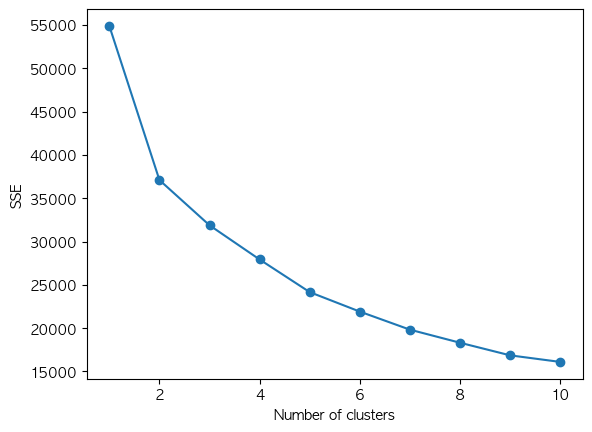

In [55]:
# 엘보우 방법
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# SSE 그래프를 그려 K 값을 결정
import matplotlib.pyplot as plt
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [43]:
# '엘보우 포인트' : 3
# K 값을 바탕으로 KMeans 인스턴스 생성
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# 군집 결과를 원본 데이터에 추가
df2['Cluster'] = clusters

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
# 군집별 통계 또는 시각화 코드
df2.groupby('Cluster').mean()  # 각 군집별 평균값 계산

TypeError: Could not convert C-10001C-10002C-10003C-10004C-10005C-10007C-10009C-10011C-10013C-10014C-10015C-10017C-10018C-10019C-10020C-10021C-10024C-10025C-10029C-10034C-10037C-10041C-10044C-10045C-10047C-10048C-10049C-10050C-10053C-10054C-10055C-10057C-10058C-10059C-10065C-10068C-10069C-10070C-10073C-10074C-10075C-10076C-10077C-10078C-10079C-10081C-10082C-10083C-10084C-10085C-10086C-10088C-10090C-10091C-10093C-10094C-10095C-10096C-10097C-10099C-10101C-10107C-10109C-10110C-10112C-10113C-10115C-10117C-10120C-10121C-10122C-10124C-10126C-10127C-10128C-10129C-10130C-10131C-10134C-10135C-10136C-10137C-10138C-10139C-10143C-10144C-10145C-10147C-10151C-10156C-10158C-10161C-10164C-10168C-10169C-10174C-10175C-10176C-10177C-10179C-10181C-10182C-10183C-10186C-10187C-10189C-10190C-10191C-10192C-10193C-10195C-10196C-10197C-10198C-10199C-10200C-10201C-10205C-10207C-10208C-10209C-10210C-10211C-10214C-10215C-10217C-10218C-10219C-10220C-10222C-10223C-10224C-10226C-10229C-10230C-10231C-10234C-10235C-10238C-10240C-10241C-10243C-10244C-10245C-10246C-10247C-10251C-10254C-10255C-10256C-10257C-10258C-10259C-10260C-10266C-10268C-10269C-10270C-10276C-10277C-10279C-10280C-10283C-10284C-10285C-10289C-10291C-10293C-10294C-10295C-10296C-10298C-10299C-10300C-10301C-10302C-10304C-10306C-10307C-10308C-10310C-10312C-10313C-10314C-10317C-10319C-10320C-10321C-10324C-10325C-10326C-10330C-10331C-10337C-10339C-10341C-10342C-10346C-10348C-10350C-10352C-10357C-10360C-10364C-10365C-10367C-10370C-10371C-10372C-10373C-10375C-10379C-10380C-10382C-10384C-10386C-10387C-10390C-10394C-10395C-10396C-10399C-10402C-10403C-10404C-10406C-10409C-10410C-10412C-10417C-10418C-10420C-10421C-10422C-10423C-10424C-10425C-10427C-10428C-10429C-10432C-10433C-10434C-10435C-10436C-10437C-10440C-10441C-10442C-10443C-10444C-10446C-10447C-10448C-10452C-10454C-10455C-10457C-10458C-10459C-10461C-10464C-10465C-10467C-10469C-10470C-10473C-10474C-10475C-10477C-10478C-10480C-10482C-10484C-10485C-10486C-10487C-10488C-10489C-10490C-10491C-10492C-10494C-10495C-10497C-10499C-10501C-10502C-10504C-10505C-10507C-10508C-10510C-10512C-10516C-10517C-10518C-10519C-10520C-10521C-10525C-10527C-10530C-10531C-10532C-10535C-10536C-10537C-10538C-10543C-10545C-10547C-10548C-10549C-10550C-10551C-10552C-10554C-10556C-10559C-10560C-10561C-10562C-10563C-10564C-10565C-10567C-10569C-10571C-10572C-10573C-10574C-10576C-10579C-10580C-10583C-10588C-10589C-10591C-10592C-10593C-10594C-10595C-10597C-10598C-10599C-10600C-10602C-10604C-10605C-10606C-10609C-10610C-10612C-10613C-10614C-10617C-10621C-10622C-10624C-10626C-10627C-10628C-10630C-10633C-10636C-10637C-10638C-10639C-10641C-10642C-10643C-10647C-10648C-10650C-10651C-10654C-10660C-10663C-10665C-10668C-10669C-10676C-10677C-10678C-10679C-10680C-10683C-10684C-10685C-10686C-10687C-10688C-10690C-10691C-10693C-10694C-10695C-10696C-10698C-10699C-10702C-10705C-10707C-10709C-10711C-10712C-10713C-10714C-10715C-10718C-10719C-10721C-10725C-10726C-10727C-10730C-10731C-10732C-10733C-10735C-10737C-10739C-10742C-10747C-10748C-10749C-10751C-10752C-10754C-10756C-10760C-10764C-10765C-10766C-10768C-10770C-10772C-10774C-10775C-10778C-10779C-10781C-10785C-10786C-10787C-10788C-10790C-10791C-10792C-10793C-10794C-10796C-10801C-10802C-10804C-10807C-10810C-10811C-10812C-10813C-10818C-10819C-10820C-10821C-10822C-10824C-10827C-10830C-10831C-10838C-10839C-10840C-10841C-10842C-10844C-10845C-10846C-10848C-10851C-10852C-10853C-10854C-10855C-10857C-10858C-10859C-10863C-10864C-10866C-10867C-10868C-10869C-10870C-10871C-10873C-10877C-10878C-10879C-10880C-10881C-10883C-10884C-10885C-10888C-10889C-10893C-10894C-10897C-10901C-10903C-10904C-10908C-10909C-10910C-10911C-10913C-10914C-10920C-10921C-10924C-10925C-10926C-10927C-10928C-10929C-10931C-10937C-10938C-10941C-10942C-10944C-10945C-10947C-10949C-10950C-10951C-10952C-10953C-10954C-10955C-10956C-10957C-10960C-10961C-10963C-10964C-10965C-10967C-10968C-10970C-10973C-10979C-10981C-10982C-10983C-10985C-10986C-10987C-10988C-10989C-10990C-10991C-10993C-10995C-10997C-11000C-11005C-11008C-11009C-11010C-11011C-11014C-11015C-11020C-11021C-11023C-11024C-11026C-11027C-11028C-11029C-11037C-11039C-11040C-11042C-11043C-11045C-11048C-11051C-11052C-11054C-11056C-11063C-11066C-11070C-11071C-11072C-11073C-11074C-11076C-11079C-11083C-11084C-11085C-11086C-11087C-11089C-11090C-11091C-11094C-11096C-11097C-11098C-11099C-11102C-11103C-11104C-11106C-11108C-11109C-11110C-11111C-11112C-11113C-11114C-11115C-11116C-11117C-11119C-11120C-11121C-11122C-11124C-11127C-11128C-11131C-11133C-11134C-11135C-11136C-11137C-11138C-11139C-11143C-11145C-11146C-11147C-11148C-11149C-11154C-11156C-11159C-11160C-11161C-11162C-11163C-11164C-11166C-11169C-11170C-11171C-11172C-11173C-11178C-11179C-11181C-11182C-11184C-11187C-11192C-11196C-11197C-11198C-11199C-11200C-11201C-11203C-11204C-11206C-11208C-11210C-11211C-11214C-11216C-11219C-11220C-11221C-11226C-11228C-11229C-11232C-11236C-11240C-11242C-11248C-11249C-11251C-11252C-11255C-11258C-11260C-11262C-11264C-11265C-11266C-11267C-11268C-11269C-11272C-11274C-11275C-11276C-11280C-11281C-11283C-11284C-11285C-11288C-11291C-11292C-11293C-11294C-11297C-11299C-11303C-11304C-11305C-11307C-11308C-11310C-11312C-11313C-11314C-11315C-11317C-11319C-11320C-11322C-11323C-11324C-11325C-11328C-11331C-11332C-11335C-11336C-11337C-11338C-11339C-11340C-11342C-11343C-11344C-11346C-11347C-11348C-11350C-11352C-11353C-11355C-11356C-11360C-11362C-11363C-11366C-11367C-11370C-11371C-11374C-11375C-11376C-11377C-11380C-11381C-11382C-11384C-11385C-11387C-11388C-11389C-11393C-11394C-11395C-11396C-11398C-11399C-11400C-11403C-11404C-11407C-11408C-11409C-11410C-11411C-11412C-11413C-11414C-11417C-11418C-11419C-11420C-11423C-11425C-11426C-11427C-11428C-11429C-11430C-11433C-11434C-11435C-11436C-11437C-11439C-11440C-11441C-11446C-11447C-11450C-11451C-11452C-11453C-11454C-11455C-11456C-11459C-11460C-11461C-11463C-11471C-11472C-11475C-11478C-11479C-11481C-11483C-11486C-11487C-11490C-11491C-11493C-11497C-11498C-11499C-11500C-11506C-11507C-11510C-11511C-11512C-11514C-11515C-11518C-11520C-11521C-11525C-11527C-11529C-11533C-11537C-11539C-11544C-11546C-11548C-11550C-11551C-11553C-11554C-11557C-11560C-11561C-11562C-11563C-11565C-11566C-11567C-11570C-11572C-11577C-11579C-11584C-11585C-11586C-11587C-11590C-11591C-11592C-11593C-11594C-11595C-11597C-11598C-11600C-11601C-11603C-11604C-11605C-11607C-11608C-11609C-11610C-11611C-11616C-11617C-11619C-11620C-11622C-11625C-11626C-11628C-11629C-11631C-11632C-11633C-11634C-11635C-11638C-11639C-11641C-11642C-11645C-11646C-11648C-11649C-11650C-11651C-11654C-11655C-11659C-11660C-11661C-11664C-11665C-11666C-11667C-11669C-11670C-11671C-11675C-11676C-11677C-11679C-11680C-11681C-11684C-11685C-11688C-11690C-11691C-11694C-11695C-11697C-11699C-11702C-11705C-11706C-11707C-11709C-11710C-11711C-11712C-11714C-11717C-11718C-11720C-11722C-11725C-11726C-11728C-11730C-11731C-11735C-11737C-11738C-11739C-11746C-11747C-11748C-11751C-11752C-11755C-11756C-11757C-11759C-11760C-11762C-11768C-11769C-11771C-11772C-11773C-11774C-11775C-11776C-11777C-11779C-11781C-11782C-11784C-11786C-11787C-11788C-11793C-11794C-11795C-11804C-11805C-11807C-11808C-11809C-11810C-11811C-11812C-11815C-11817C-11818C-11819C-11820C-11821C-11823C-11824C-11826C-11829C-11830C-11831C-11832C-11834C-11835C-11837C-11838C-11840C-11842C-11843C-11844C-11846C-11847C-11848C-11849C-11851C-11852C-11853C-11854C-11857C-11858C-11859C-11861C-11863C-11864C-11867C-11868C-11869C-11871C-11874C-11876C-11877C-11883C-11884C-11885C-11888C-11889C-11890C-11891C-11892C-11894C-11895C-11896C-11897C-11898C-11899C-11900C-11901C-11902C-11904C-11905C-11906C-11909C-11910C-11911C-11912C-11913C-11915C-11917C-11918C-11919C-11920C-11921C-11924C-11926C-11927C-11930C-11932C-11939C-11941C-11942C-11943C-11945C-11946C-11950C-11951C-11952C-11954C-11956C-11958C-11960C-11961C-11962C-11963C-11966C-11967C-11969C-11971C-11973C-11974C-11975C-11976C-11977C-11978C-11980C-11981C-11982C-11985C-11986C-11987C-11988C-11989C-11990C-11991C-11995C-11996C-11998C-11999C-12001C-12004C-12006C-12009C-12012C-12013C-12018C-12019C-12020C-12023C-12025C-12028C-12030C-12031C-12032C-12033C-12037C-12039C-12042C-12044C-12047C-12049C-12050C-12051C-12052C-12053C-12054C-12056C-12057C-12058C-12059C-12060C-12062C-12063C-12066C-12067C-12068C-12069C-12070C-12071C-12072C-12073C-12075C-12076C-12079C-12081C-12083C-12085C-12086C-12087C-12088C-12089C-12092C-12093C-12096C-12098C-12099C-12100C-12104C-12105C-12108C-12112C-12113C-12114C-12115C-12116C-12118C-12119C-12120C-12126C-12127C-12128C-12129C-12130C-12132C-12134C-12137C-12138C-12139C-12140C-12141C-12143C-12147C-12148C-12153C-12156C-12157C-12158C-12159C-12160C-12161C-12162C-12163C-12164C-12167C-12169C-12170C-12171C-12174C-12175C-12178C-12181C-12185C-12187C-12189C-12190C-12191C-12192C-12194C-12195C-12197C-12198C-12203C-12204C-12205C-12208C-12210C-12211C-12212C-12213C-12219C-12222C-12224C-12225C-12227C-12229C-12231C-12235C-12236C-12238C-12239C-12240C-12241C-12242C-12244C-12245C-12246C-12249C-12250C-12253C-12254C-12255C-12256C-12257C-12260C-12263C-12265C-12266C-12268C-12269C-12271C-12272C-12273C-12275C-12277C-12278C-12279C-12280C-12281C-12283C-12284C-12285C-12288C-12289C-12291C-12294C-12296C-12298C-12301C-12302C-12303C-12306C-12308C-12309C-12310C-12312C-12313C-12315C-12317C-12318C-12320C-12321C-12322C-12323C-12324C-12325C-12327C-12329C-12332C-12333C-12336C-12338C-12340C-12341C-12342C-12343C-12344C-12346C-12349C-12350C-12352C-12354C-12357C-12358C-12360C-12362C-12364C-12366C-12369C-12371C-12372C-12374C-12377C-12378C-12381C-12383C-12384C-12385C-12386C-12387C-12390C-12391C-12392C-12396C-12397C-12398C-12400C-12401C-12402C-12403C-12406C-12408C-12409C-12411C-12412C-12414C-12415C-12416C-12418C-12421C-12422C-12423C-12425C-12429C-12434C-12435C-12437C-12439C-12440C-12441C-12443C-12444C-12447C-12449C-12451C-12454C-12455C-12457C-12459C-12463C-12466C-12468C-12471C-12473C-12474C-12479C-12481C-12482C-12484C-12486C-12487C-12489C-12491C-12492C-12494C-12497C-12499C-12501C-12502C-12505C-12507C-12509C-12511C-12512C-12513C-12514C-12516C-12517C-12519C-12520C-12521C-12522C-12523C-12524C-12529C-12530C-12531C-12532C-12533C-12536C-12538C-12539C-12540C-12541C-12545C-12547C-12548C-12549C-12550C-12551C-12556C-12559C-12561C-12562C-12563C-12565C-12569C-12570C-12571C-12572C-12573C-12576C-12579C-12581C-12585C-12586C-12587C-12589C-12591C-12593C-12596C-12597C-12599C-12600C-12601C-12604C-12605C-12606C-12607C-12608C-12609C-12611C-12612C-12613C-12615C-12616C-12619C-12622C-12623C-12627C-12628C-12629C-12632C-12636C-12637C-12638C-12639C-12640C-12641C-12643C-12644C-12646C-12650C-12653C-12656C-12657C-12658C-12660C-12663C-12664C-12665C-12668C-12669C-12673C-12674C-12676C-12678C-12679C-12680C-12682C-12683C-12685C-12686C-12689C-12690C-12692C-12694C-12695C-12698C-12701C-12704C-12706C-12708C-12710C-12712C-12713C-12714C-12715C-12717C-12719C-12723C-12724C-12726C-12727C-12729C-12731C-12732C-12739C-12742C-12744C-12747C-12750C-12754C-12756C-12757C-12759C-12760C-12761C-12763C-12764C-12765C-12767C-12768C-12770C-12771C-12775C-12776C-12779C-12780C-12781C-12782C-12783C-12785C-12787C-12790C-12791C-12792C-12793C-12794C-12795C-12796C-12797C-12798C-12799C-12801C-12803C-12804C-12805C-12806C-12807C-12810C-12814C-12815C-12818C-12819C-12821C-12824C-12825C-12826C-12828C-12831C-12834C-12835C-12836C-12838C-12839C-12845C-12847C-12848C-12850C-12851C-12852C-12857C-12859C-12860C-12862C-12863C-12864C-12866C-12867C-12870C-12872C-12873C-12875C-12876C-12879C-12881C-12882C-12883C-12885C-12888C-12889C-12890C-12892C-12893C-12895C-12897C-12898C-12901C-12902C-12904C-12905C-12906C-12907C-12908C-12909C-12911C-12912C-12913C-12914C-12915C-12916C-12917C-12919C-12920C-12921C-12923C-12925C-12926C-12930C-12931C-12933C-12934C-12936C-12940C-12945C-12946C-12947C-12948C-12950C-12952C-12953C-12954C-12955C-12957C-12958C-12959C-12961C-12962C-12964C-12966C-12967C-12969C-12971C-12972C-12973C-12974C-12981C-12982C-12985C-12988C-12989C-12990C-12991C-12992C-12993C-12994C-12995C-12996C-12999C-13003C-13004C-13005C-13011C-13013C-13015C-13016C-13018C-13019C-13020C-13021C-13023C-13024C-13025C-13027C-13028C-13029C-13030C-13031C-13032C-13033C-13034C-13035C-13037C-13039C-13040C-13043C-13044C-13046C-13048C-13051C-13052C-13054C-13055C-13056C-13057C-13058C-13061C-13063C-13064C-13067C-13068C-13069C-13071C-13073C-13074C-13075C-13076C-13077C-13078C-13079C-13080C-13082C-13084C-13085C-13088C-13089C-13090C-13091C-13092C-13094C-13095C-13096C-13097C-13098C-13102C-13103C-13105C-13107C-13108C-13111C-13112C-13114C-13115C-13116C-13117C-13118C-13122C-13123C-13124C-13125C-13127C-13129C-13132C-13137C-13139C-13141C-13142C-13144C-13145C-13147C-13149C-13151C-13154C-13155C-13156C-13157C-13158C-13159C-13163C-13166C-13167C-13168C-13169C-13171C-13172C-13174C-13175C-13176C-13178C-13179C-13182C-13183C-13185C-13186C-13187C-13189C-13190C-13191C-13192C-13196C-13197C-13198C-13199C-13202C-13205C-13206C-13207C-13208C-13209C-13210C-13212C-13216C-13217C-13219C-13220C-13222C-13223C-13224C-13225C-13226C-13228C-13230C-13232C-13233C-13234C-13235C-13238C-13239C-13242C-13244C-13248C-13250C-13251C-13252C-13257C-13259C-13260C-13261C-13262C-13263C-13265C-13268C-13269C-13270C-13271C-13274C-13276C-13279C-13283C-13284C-13286C-13287C-13288C-13289C-13290C-13291C-13294C-13295C-13298C-13300C-13301C-13302C-13305C-13307C-13308C-13309C-13311C-13312C-13313C-13316C-13317C-13318C-13320C-13325C-13326C-13329C-13332C-13334C-13336C-13337C-13347C-13349C-13352C-13354C-13356C-13357C-13358C-13359C-13360C-13361C-13362C-13363C-13364C-13365C-13367C-13369C-13370C-13371C-13374C-13376C-13377C-13378C-13379C-13380C-13381C-13383C-13384C-13387C-13390C-13391C-13395C-13396C-13397C-13398C-13400C-13402C-13403C-13406C-13408C-13410C-13411C-13412C-13414C-13416C-13418C-13420C-13422C-13423C-13427C-13429C-13430C-13431C-13432C-13434C-13435C-13436C-13438C-13439C-13443C-13446C-13448C-13449C-13450C-13453C-13454C-13456C-13458C-13460C-13461C-13462C-13463C-13467C-13468C-13469C-13471C-13473C-13474C-13476C-13478C-13479C-13480C-13481C-13483C-13484C-13485C-13486C-13488C-13489C-13490C-13491C-13494C-13495C-13496C-13498C-13502C-13503C-13504C-13505C-13507C-13508C-13510C-13513C-13515C-13517C-13518C-13520C-13521C-13523C-13526C-13530C-13533C-13534C-13536C-13540C-13542C-13543C-13546C-13547C-13548C-13553C-13555C-13557C-13558C-13561C-13562C-13565C-13566C-13570C-13575C-13576C-13577C-13579C-13582C-13583C-13584C-13585C-13586C-13587C-13589C-13590C-13591C-13593C-13594C-13595C-13596C-13598C-13600C-13601C-13607C-13610C-13611C-13612C-13613C-13614C-13617C-13620C-13621C-13625C-13627C-13628C-13630C-13631C-13633C-13634C-13635C-13636C-13637C-13639C-13641C-13642C-13650C-13651C-13655C-13657C-13660C-13663C-13664C-13667C-13668C-13669C-13670C-13672C-13673C-13677C-13679C-13680C-13683C-13684C-13685C-13692C-13694C-13695C-13696C-13697C-13699C-13700C-13701C-13704C-13706C-13709C-13710C-13712C-13713C-13714C-13715C-13717C-13718C-13719C-13720C-13721C-13722C-13723C-13724C-13725C-13727C-13729C-13730C-13736C-13738C-13742C-13743C-13747C-13748C-13749C-13750C-13751C-13753C-13754C-13755C-13756C-13759C-13763C-13764C-13765C-13766C-13770C-13772C-13773C-13774C-13776C-13777C-13778C-13781C-13782C-13788C-13789C-13792C-13793C-13797C-13798C-13800C-13802C-13803C-13805C-13806C-13807C-13809C-13811C-13814C-13815C-13816C-13818C-13820C-13821C-13822C-13824C-13827C-13828C-13829C-13830C-13831C-13832C-13833C-13835C-13836C-13837C-13838C-13839C-13840C-13841C-13844C-13847C-13848C-13849C-13851C-13852C-13853C-13854C-13855C-13856C-13857C-13858C-13859C-13860C-13863C-13864C-13865C-13868C-13869C-13870C-13871C-13872C-13873C-13875C-13878C-13880C-13885C-13886C-13887C-13888C-13889C-13890C-13894C-13895C-13896C-13900C-13901C-13902C-13903C-13905C-13906C-13907C-13909C-13910C-13912C-13913C-13914C-13915C-13916C-13918C-13920C-13921C-13923C-13925C-13928C-13929C-13930C-13932C-13934C-13936C-13937C-13938C-13939C-13940C-13941C-13942C-13944C-13948C-13949C-13950C-13951C-13952C-13954C-13955C-13956C-13958C-13959C-13960C-13962C-13963C-13965C-13968C-13969C-13970C-13971C-13973C-13974C-13975C-13977C-13978C-13979C-13980C-13982C-13983C-13984C-13987C-13989C-13990C-13991C-13992C-13993C-13994C-13996C-14001C-14002C-14004C-14005C-14006C-14007C-14008C-14009C-14010C-14011C-14012C-14014C-14015C-14016C-14018C-14020C-14022C-14024C-14026C-14032C-14033C-14034C-14037C-14040C-14042C-14044C-14045C-14047C-14050C-14051C-14052C-14054C-14056C-14057C-14058C-14065C-14066C-14071C-14072C-14073C-14074C-14075C-14076C-14079C-14080C-14081C-14082C-14084C-14085C-14087C-14088C-14089C-14090C-14091C-14096C-14097C-14098C-14101C-14103C-14105C-14108C-14109C-14111C-14112C-14115C-14116C-14122C-14124C-14125C-14126C-14127C-14131C-14135C-14138C-14139C-14141C-14146C-14148C-14149C-14151C-14152C-14153C-14155C-14158C-14159C-14161C-14166C-14169C-14170C-14172C-14175C-14177C-14178C-14180C-14181C-14183C-14184C-14185C-14186C-14188C-14189C-14190C-14191C-14193C-14194C-14196C-14198C-14199C-14200C-14201C-14202C-14204C-14207C-14209C-14210C-14214C-14216C-14219C-14220C-14221C-14222C-14223C-14224C-14225C-14227C-14231C-14232C-14236C-14240C-14241C-14242C-14244C-14245C-14246C-14247C-14250C-14251C-14253C-14254C-14255C-14256C-14257C-14259C-14261C-14262C-14263C-14264C-14265C-14266C-14268C-14271C-14273C-14274C-14276C-14279C-14280C-14281C-14282C-14284C-14285C-14286C-14287C-14288C-14289C-14291C-14294C-14295C-14296C-14297C-14299C-14300C-14302C-14303C-14305C-14306C-14308C-14309C-14310C-14311C-14312C-14314C-14315C-14316C-14317C-14318C-14319C-14321C-14323C-14325C-14326C-14327C-14331C-14332C-14333C-14336C-14338C-14340C-14342C-14343C-14344C-14347C-14348C-14350C-14351C-14352C-14353C-14354C-14356C-14357C-14358C-14360C-14361C-14365C-14366C-14368C-14369C-14370C-14371C-14373C-14375C-14377C-14378C-14381C-14382C-14383C-14384C-14385C-14386C-14387C-14389C-14390C-14391C-14393C-14397C-14400C-14401C-14402C-14405C-14406C-14407C-14408C-14409C-14410C-14411C-14413C-14414C-14415C-14417C-14418C-14420C-14422C-14425C-14428C-14430C-14434C-14435C-14437C-14439C-14440C-14441C-14442C-14443C-14444C-14447C-14449C-14452C-14453C-14454C-14456C-14459C-14463C-14464C-14468C-14469C-14470C-14472C-14473C-14475C-14476C-14477C-14478C-14479C-14482C-14483C-14484C-14485C-14486C-14487C-14489C-14490C-14491C-14492C-14493C-14494C-14498C-14500C-14501C-14504C-14505C-14506C-14508C-14511C-14513C-14514C-14516C-14518C-14519C-14522C-14524C-14527C-14528C-14530C-14531C-14534C-14535C-14537C-14538C-14540C-14541C-14542C-14543C-14544C-14545C-14546C-14547C-14549C-14550C-14551C-14554C-14556C-14558C-14560C-14562C-14563C-14566C-14568C-14570C-14572C-14574C-14576C-14578C-14582C-14583C-14585C-14587C-14589C-14594C-14597C-14598C-14599C-14600C-14602C-14604C-14605C-14607C-14609C-14610C-14616C-14617C-14618C-14620C-14623C-14624C-14626C-14628C-14630C-14632C-14633C-14634C-14635C-14636C-14637C-14639C-14642C-14643C-14646C-14648C-14649C-14652C-14653C-14654C-14655C-14656C-14662C-14663C-14665C-14666C-14667C-14668C-14671C-14672C-14674C-14675C-14677C-14678C-14679C-14680C-14686C-14690C-14691C-14694C-14696C-14697C-14699C-14704C-14705C-14706C-14709C-14712C-14714C-14716C-14717C-14718C-14721C-14722C-14725C-14727C-14728C-14730C-14732C-14734C-14737C-14738C-14740C-14743C-14744C-14747C-14748C-14749C-14750C-14751C-14752C-14753C-14754C-14756C-14757C-14758C-14760C-14763C-14764C-14765C-14766C-14768C-14769C-14770C-14771C-14772C-14775C-14777C-14778C-14781C-14785C-14786C-14787C-14790C-14791C-14792C-14793C-14795C-14797C-14798C-14799C-14801C-14802C-14803C-14806C-14812C-14815C-14816C-14819C-14820C-14823C-14824C-14828C-14829C-14831C-14832C-14833C-14834C-14836C-14837C-14838C-14840C-14843C-14844C-14845C-14846C-14847C-14849C-14851C-14853C-14855C-14860C-14862C-14863C-14865C-14867C-14870C-14872C-14876C-14877C-14881C-14883C-14885C-14887C-14888C-14890C-14891C-14892C-14893C-14895C-14897C-14898C-14900C-14901C-14902C-14904C-14906C-14908C-14909C-14910C-14911C-14913C-14915C-14916C-14918C-14919C-14920C-14921C-14922C-14923C-14925C-14926C-14930C-14933C-14934C-14940C-14941C-14943C-14944C-14949C-14950C-14952C-14953C-14956C-14957C-14961C-14963C-14965C-14966C-14967C-14968C-14969C-14974C-14975C-14978C-14979C-14980C-14981C-14985C-14988C-14989C-14990C-14996C-14998C-14999C-15000C-15001C-15002C-15003C-15004C-15006C-15007C-15009C-15012C-15013C-15015C-15016C-15017C-15018C-15020C-15021C-15022C-15024C-15025C-15026C-15029C-15032C-15033C-15034C-15037C-15039C-15040C-15043C-15046C-15047C-15054C-15056C-15060C-15062C-15064C-15065C-15066C-15067C-15068C-15069C-15070C-15071C-15072C-15073C-15075C-15076C-15077C-15078C-15080C-15081C-15082C-15083C-15085C-15086C-15087C-15088C-15089C-15092C-15093C-15102C-15108C-15111C-15114C-15115C-15116C-15117C-15118C-15119C-15120C-15121C-15122C-15130C-15131C-15134C-15136C-15138C-15139C-15140C-15141C-15143C-15144C-15145C-15148C-15149C-15152C-15154C-15155C-15156C-15157C-15158C-15159C-15160C-15161C-15166C-15168C-15169C-15170C-15171C-15172C-15175C-15176C-15177C-15178C-15179C-15180C-15182C-15183C-15186C-15187C-15188C-15189C-15191C-15192C-15193C-15195C-15196C-15197C-15198C-15200C-15201C-15205C-15206C-15209C-15211C-15214C-15216C-15221C-15222C-15223C-15224C-15225C-15226C-15227C-15228C-15229C-15230C-15232C-15234C-15235C-15236C-15237C-15238C-15239C-15240C-15241C-15244C-15245C-15246C-15247C-15250C-15251C-15255C-15258C-15261C-15262C-15264C-15266C-15268C-15269C-15271C-15273C-15274C-15275C-15276C-15277C-15280C-15282C-15284C-15285C-15287C-15288C-15289C-15290C-15291C-15293C-15296C-15297C-15299C-15301C-15302C-15304C-15306C-15311C-15312C-15314C-15318C-15319C-15320C-15321C-15322C-15323C-15328C-15329C-15330C-15332C-15334C-15335C-15336C-15338C-15340C-15342C-15343C-15344C-15346C-15347C-15348C-15350C-15352C-15353C-15354C-15355C-15360C-15362C-15363C-15364C-15367C-15368C-15370C-15371C-15372C-15373C-15374C-15376C-15378C-15379C-15382C-15383C-15384C-15387C-15389C-15391C-15392C-15395C-15397C-15399C-15400C-15401C-15402C-15404C-15405C-15407C-15408C-15409C-15413C-15414C-15415C-15416C-15418C-15419C-15421C-15422C-15424C-15426C-15427C-15430C-15431C-15436C-15439C-15440C-15442C-15446C-15449C-15450C-15453C-15456C-15457C-15458C-15459C-15461C-15467C-15468C-15469C-15470C-15472C-15473C-15474C-15475C-15476C-15477C-15478C-15481C-15482C-15486C-15490C-15491C-15494C-15495C-15496C-15497C-15501C-15502C-15503C-15504C-15505C-15507C-15508C-15510C-15511C-15516C-15517C-15519C-15520C-15522C-15523C-15524C-15525C-15526C-15529C-15531C-15532C-15533C-15534C-15535C-15536C-15537C-15538C-15540C-15542C-15543C-15545C-15546C-15547C-15548C-15549C-15550C-15551C-15553C-15554C-15557C-15558C-15559C-15563C-15569C-15571C-15572C-15573C-15575C-15576C-15577C-15578C-15579C-15580C-15581C-15582C-15586C-15588C-15589C-15591C-15592C-15593C-15594C-15595C-15597C-15598C-15600C-15601C-15602C-15603C-15604C-15612C-15614C-15615C-15618C-15621C-15622C-15623C-15626C-15627C-15631C-15635C-15636C-15638C-15639C-15640C-15643C-15644C-15645C-15647C-15648C-15650C-15653C-15654C-15655C-15659C-15660C-15661C-15663C-15667C-15671C-15672C-15673C-15675C-15676C-15677C-15678C-15680C-15681C-15682C-15683C-15684C-15686C-15687C-15689C-15690C-15691C-15693C-15694C-15695C-15697C-15699C-15703C-15704C-15707C-15708C-15710C-15714C-15716C-15717C-15720C-15721C-15723C-15724C-15725C-15726C-15727C-15730C-15731C-15732C-15736C-15737C-15738C-15740C-15741C-15743C-15744C-15746C-15747C-15749C-15750C-15751C-15753C-15754C-15755C-15757C-15758C-15762C-15763C-15768C-15769C-15771C-15772C-15773C-15774C-15778C-15781C-15782C-15784C-15786C-15789C-15791C-15792C-15794C-15797C-15802C-15804C-15807C-15809C-15812C-15813C-15814C-15815C-15816C-15818C-15819C-15820C-15821C-15823C-15825C-15829C-15830C-15831C-15833C-15836C-15837C-15839C-15848C-15849C-15850C-15853C-15856C-15857C-15858C-15860C-15861C-15862C-15863C-15865C-15866C-15867C-15868C-15870C-15871C-15872C-15876C-15877C-15878C-15879C-15880C-15882C-15883C-15884C-15885C-15887C-15888C-15889C-15891C-15892C-15893C-15896C-15897C-15898C-15899C-15900C-15901C-15902C-15905C-15906C-15907C-15908C-15909C-15910C-15913C-15914C-15915C-15916C-15919C-15920C-15921C-15923C-15924C-15926C-15927C-15931C-15933C-15934C-15935C-15936C-15940C-15941C-15945C-15946C-15948C-15949C-15950C-15952C-15953C-15954C-15957C-15958C-15962C-15965C-15966C-15967C-15969C-15970C-15971C-15972C-15973C-15975C-15978C-15979C-15981C-15982C-15983C-15984C-15985C-15986C-15987C-15988C-15989C-15993C-15994C-15995C-15996C-15997C-15998C-15999C-16002C-16003C-16005C-16006C-16007C-16010C-16012C-16013C-16014C-16015C-16016C-16018C-16019C-16020C-16022C-16025C-16026C-16027C-16030C-16032C-16033C-16034C-16035C-16039C-16040C-16042C-16044C-16049C-16050C-16052C-16053C-16055C-16056C-16057C-16058C-16059C-16062C-16064C-16065C-16066C-16068C-16069C-16071C-16073C-16075C-16078C-16081C-16082C-16083C-16084C-16085C-16086C-16087C-16088C-16090C-16093C-16095C-16097C-16098C-16099C-16102C-16103C-16104C-16105C-16107C-16110C-16112C-16114C-16115C-16117C-16119C-16121C-16124C-16125C-16126C-16128C-16129C-16131C-16133C-16134C-16137C-16138C-16139C-16140C-16141C-16142C-16143C-16144C-16148C-16149C-16151C-16153C-16155C-16156C-16157C-16162C-16163C-16169C-16171C-16172C-16173C-16178C-16179C-16180C-16183C-16184C-16185C-16189C-16190C-16193C-16194C-16196C-16199C-16202C-16203C-16206C-16208C-16211C-16212C-16213C-16214C-16215C-16216C-16218C-16219C-16220C-16222C-16223C-16225C-16226C-16228C-16230C-16231C-16235C-16236C-16238C-16242C-16246C-16247C-16248C-16249C-16250C-16253C-16254C-16257C-16258C-16261C-16262C-16263C-16264C-16266C-16267C-16268C-16270C-16271C-16273C-16274C-16277C-16280C-16281C-16282C-16284C-16285C-16286C-16287C-16288C-16289C-16290C-16295C-16297C-16298C-16299C-16301C-16302C-16304C-16306C-16307C-16308C-16312C-16313C-16314C-16315C-16316C-16317C-16318C-16323C-16324C-16325C-16330C-16335C-16336C-16337C-16338C-16341C-16342C-16343C-16346C-16347C-16348C-16349C-16350C-16351C-16354C-16355C-16356C-16357C-16358C-16361C-16362C-16363C-16365C-16366C-16367C-16368C-16369C-16370C-16371C-16372C-16374C-16375C-16377C-16378C-16380C-16381C-16382C-16384C-16385C-16389C-16393C-16394C-16395C-16396C-16397C-16398C-16399C-16400C-16404C-16409C-16411C-16412C-16413C-16415C-16417C-16419C-16421C-16422C-16423C-16424C-16425C-16426C-16427C-16428C-16429C-16430C-16432C-16436C-16437C-16442C-16443C-16444C-16447C-16449C-16450C-16451C-16452C-16455C-16456C-16460C-16462C-16463C-16465C-16466C-16467C-16468C-16469C-16471C-16472C-16476C-16477C-16479C-16480C-16484C-16487C-16488C-16491C-16494C-16495C-16496C-16497C-16498C-16501C-16502C-16505C-16506C-16508C-16509C-16510C-16511C-16516C-16517C-16520C-16522C-16524C-16525C-16529C-16530C-16532C-16533C-16534C-16535C-16536C-16538C-16539C-16541C-16543C-16545C-16546C-16547C-16548C-16551C-16553C-16557C-16560C-16562C-16563C-16565C-16566C-16568C-16570C-16571C-16572C-16576C-16578C-16579C-16581C-16583C-16585C-16586C-16587C-16588C-16590C-16591C-16592C-16593C-16594C-16597C-16599C-16600C-16601C-16605C-16606C-16607C-16608C-16610C-16611C-16612C-16613C-16614C-16615C-16616C-16618C-16620C-16622C-16623C-16624C-16625C-16626C-16631C-16633C-16634C-16636C-16639C-16640C-16641C-16643C-16644C-16645C-16646C-16648C-16652C-16653C-16654C-16655C-16659C-16664C-16666C-16675C-16676C-16677C-16679C-16683C-16686C-16687C-16688C-16690C-16691C-16693C-16695C-16696C-16697C-16698C-16699C-16700C-16702C-16703C-16705C-16706C-16707C-16709C-16711C-16713C-16714C-16718C-16721C-16722C-16724C-16731C-16732C-16733C-16734C-16736C-16738C-16739C-16744C-16745C-16746C-16750C-16752C-16756C-16758C-16760C-16761C-16762C-16763C-16764C-16765C-16766C-16767C-16769C-16770C-16772C-16773C-16774C-16775C-16776C-16777C-16778C-16779C-16781C-16782C-16784C-16786C-16789C-16791C-16793C-16797C-16800C-16803C-16804C-16808C-16809C-16810C-16811C-16813C-16819C-16820C-16821C-16822C-16827C-16828C-16829C-16830C-16831C-16835C-16836C-16837C-16838C-16843C-16844C-16846C-16847C-16851C-16852C-16855C-16857C-16861C-16864C-16865C-16866C-16868C-16871C-16873C-16875C-16876C-16878C-16879C-16880C-16881C-16882C-16883C-16888C-16890C-16894C-16895C-16899C-16900C-16902C-16903C-16906C-16909C-16910C-16912C-16913C-16914C-16915C-16916C-16918C-16919C-16920C-16922C-16925C-16927C-16928C-16929C-16931C-16932C-16933C-16934C-16935C-16938C-16939C-16942C-16944C-16945C-16946C-16947C-16948C-16951C-16954C-16955C-16956C-16958C-16959C-16961C-16962C-16963C-16966C-16970C-16972C-16973C-16976C-16977C-16978C-16980C-16981C-16982C-16984C-16985C-16986C-16988C-16989C-16992C-16993C-16994C-16996C-16997C-16999C-17001C-17003C-17004C-17006C-17007C-17008C-17009C-17010C-17011C-17013C-17014C-17016C-17018C-17020C-17021C-17023C-17024C-17025C-17027C-17030C-17031C-17034C-17035C-17037C-17038C-17040C-17043 to numeric

In [ ]:
#['결혼여부', '부양자수', '추천횟수','데이터사용량','데이터사용료','평균과금액','유지일']
# 범주형
# 결혼여부
# 그외...

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [68]:
# 원-핫 인코더 생성
encoder = OneHotEncoder(sparse=False)

# 범주형 변수를 선택하여 원-핫 인코딩 수행
categorical_cols = ['결혼여부','부양자유무','보안서비스','백업서비스', 
                    '기술지원서비스','고객이탈여부']
categorical_data_encoded = encoder.fit_transform(df2[categorical_cols])

# 원-핫 인코딩 결과를 DataFrame으로 변환
categorical_df = pd.DataFrame(categorical_data_encoded,
                              columns=encoder.get_feature_names_out(categorical_cols))

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [69]:
# 수치형 변수의 컬럼 이름을 리스트로 지정
numerical_cols = ['추천횟수','데이터사용량','데이터사용료',
                  '평균과금액','유지일','만족도']
numerical_df = df2[numerical_cols]

In [70]:
# 수치형 데이터와 인코딩된 범주형 데이터를 결합
combined_df = pd.concat([numerical_df, categorical_df], axis=1)

In [71]:
# 군집 분석 수행
for i in [2, 3, 4, 5]:
    cluster_n = KMeans(n_clusters=i, random_state=42)
    n_target = cluster_n.fit_predict(combined_df)
    silhouette_avg = silhouette_score(combined_df, n_target)
    print(f'{i} 군집에서 실루엣 값: {silhouette_avg}')

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 군집에서 실루엣 값: 0.551174509300948


/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 군집에서 실루엣 값: 0.6340501013288122


/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 군집에서 실루엣 값: 0.5895715986397921


/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 군집에서 실루엣 값: 0.5884493505084752


In [73]:
# 3 군집을 위한 KMeans 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, random_state=42)
combined_df['cluster'] = kmeans.fit_predict(combined_df)

# 군집 레이블을 결과 DataFrame에 추가
combined_df['cluster_label'] = kmeans.labels_

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


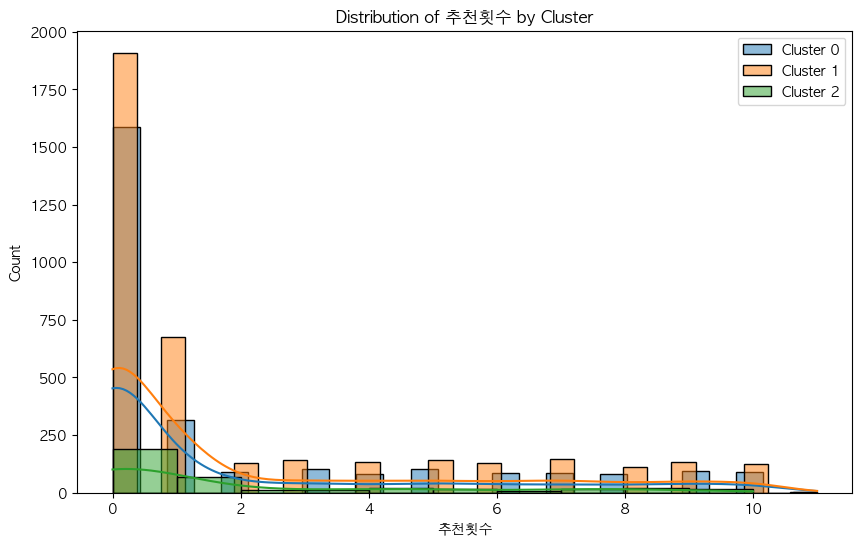

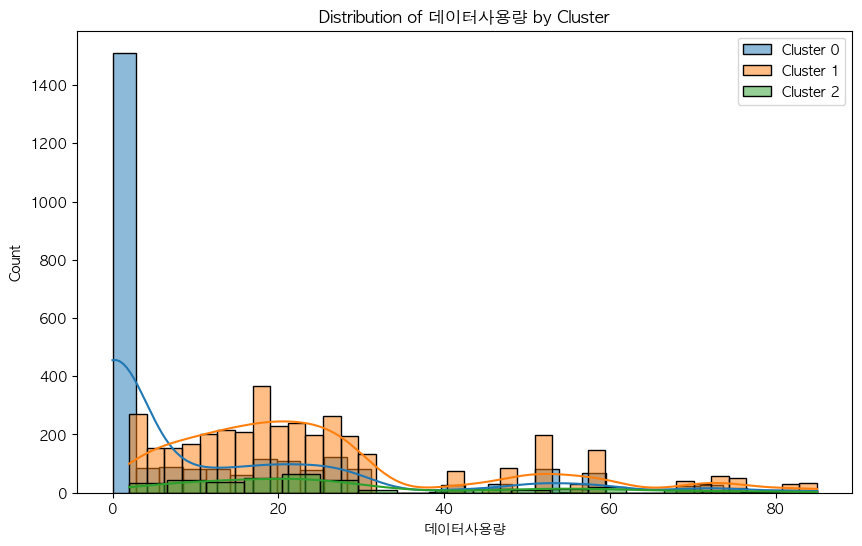

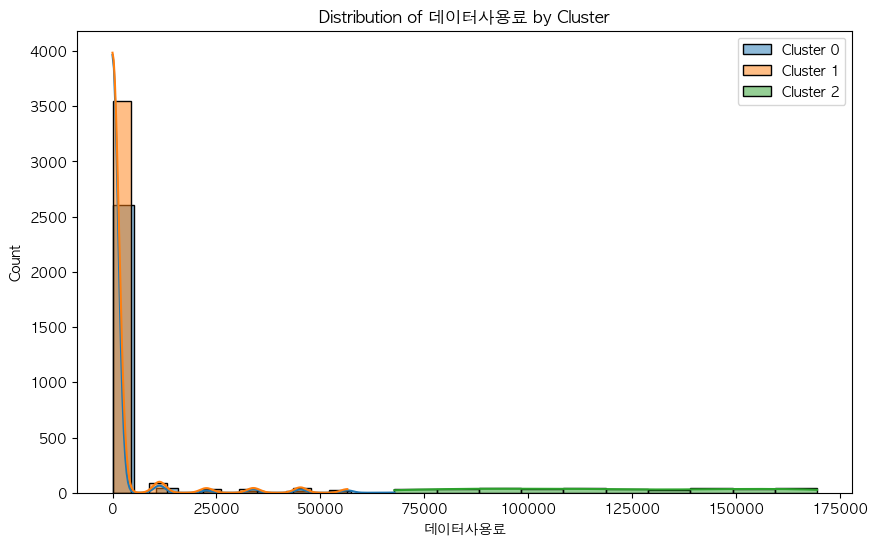

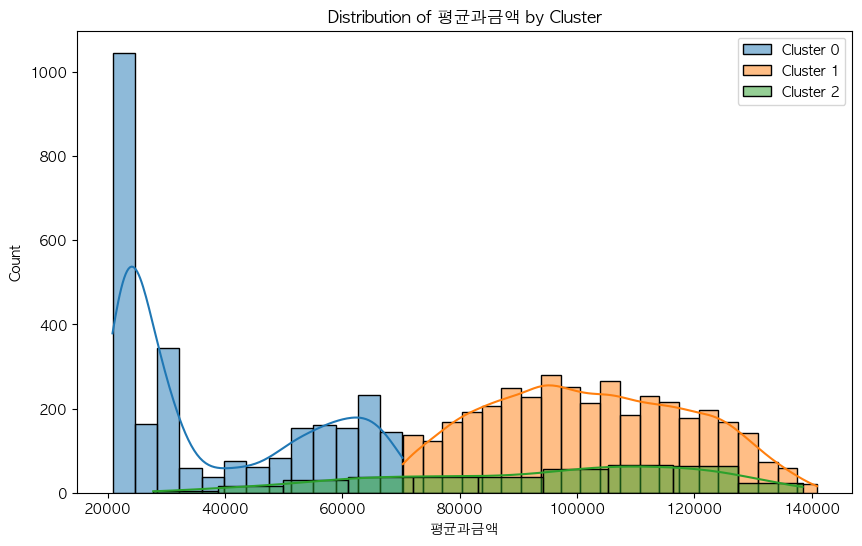

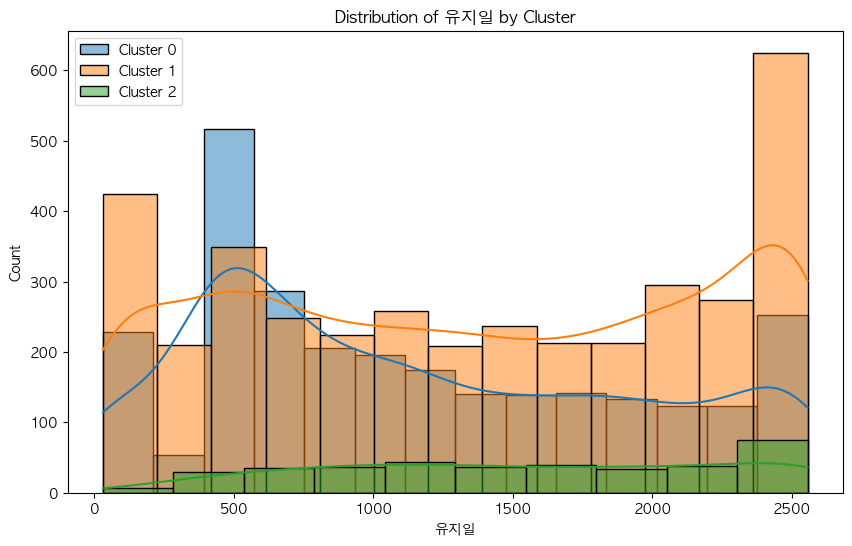

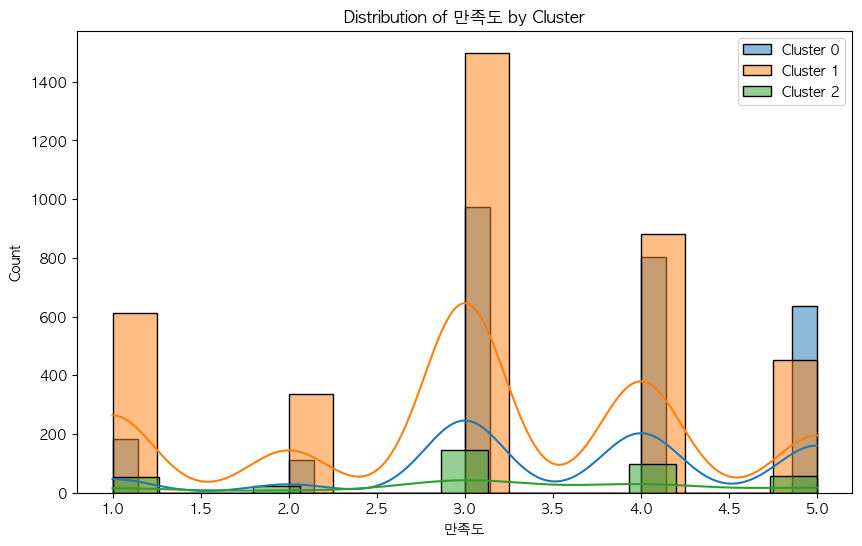

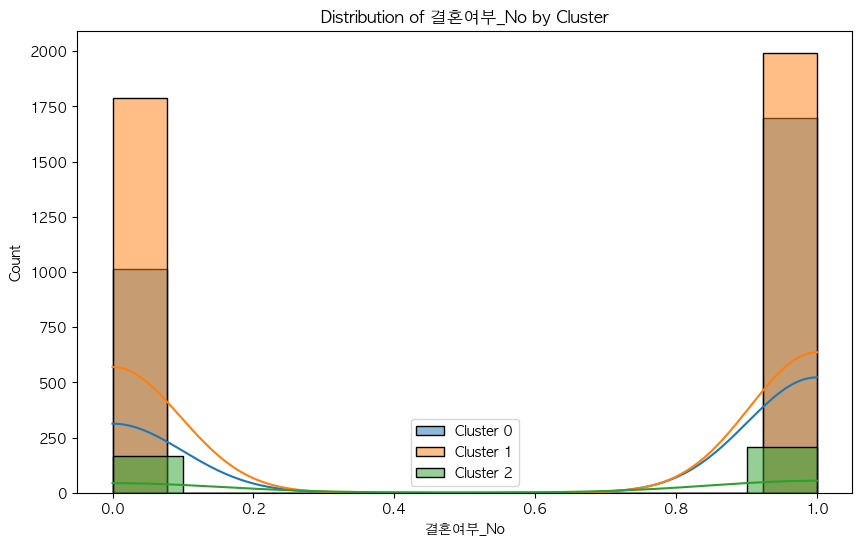

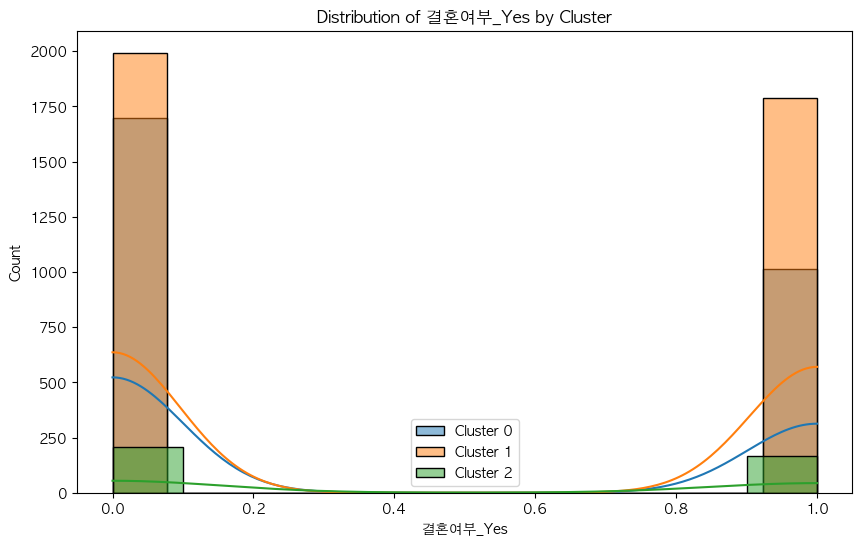

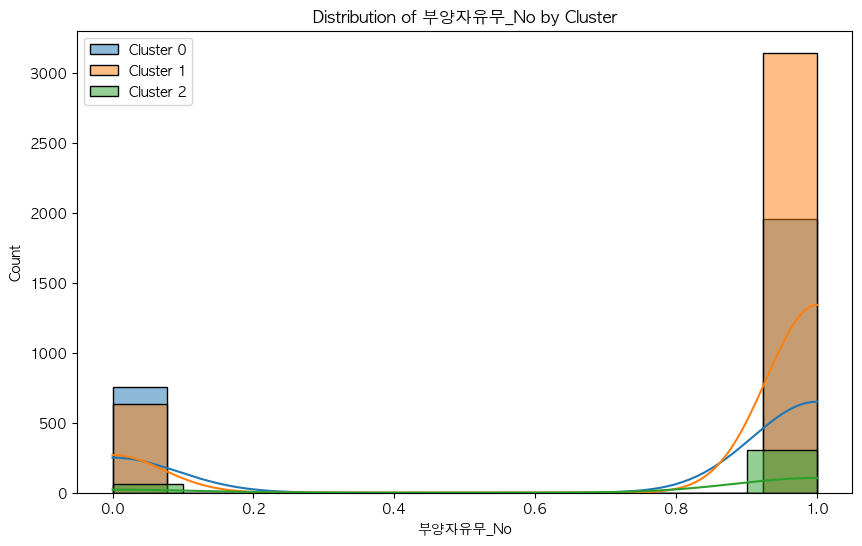

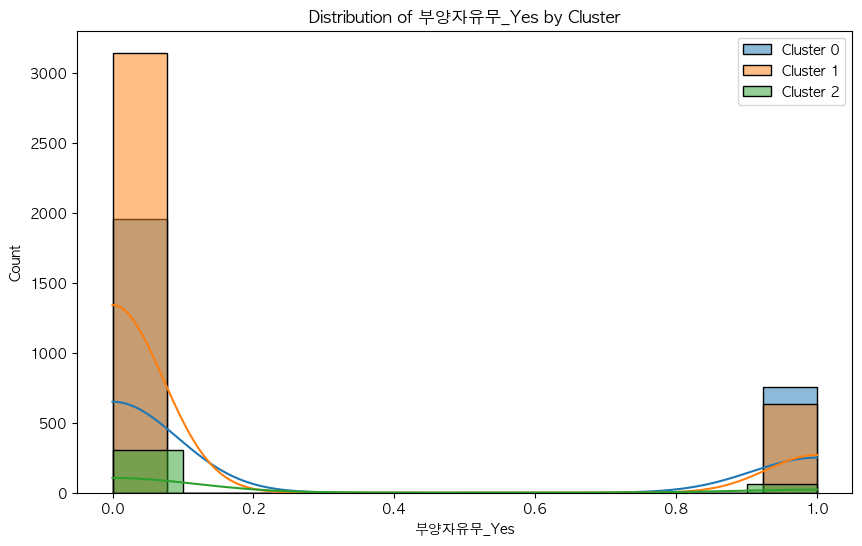

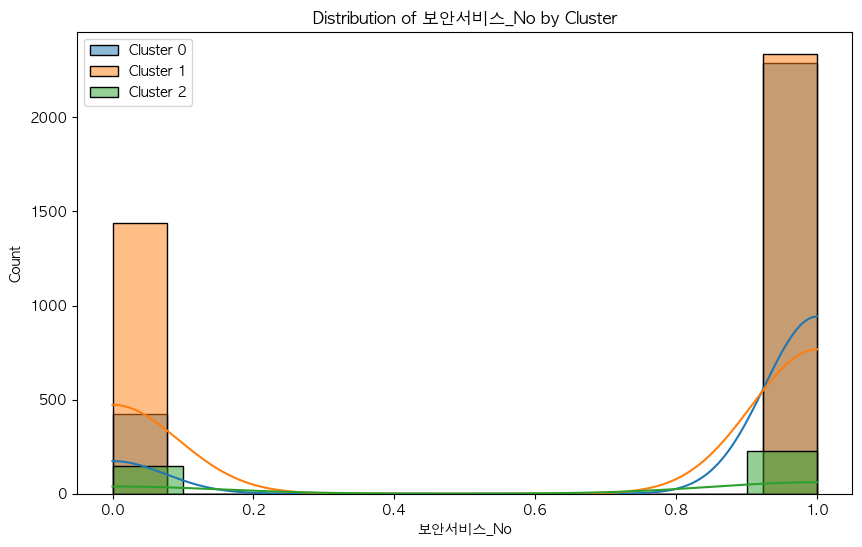

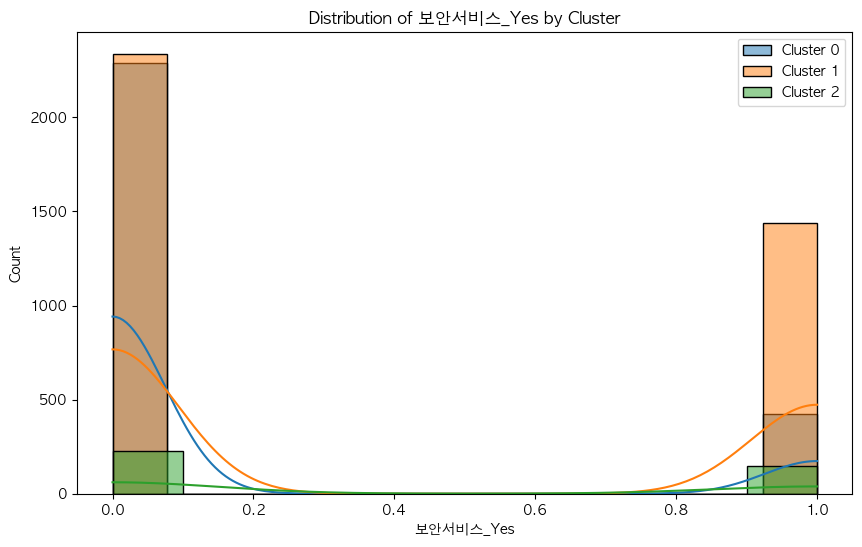

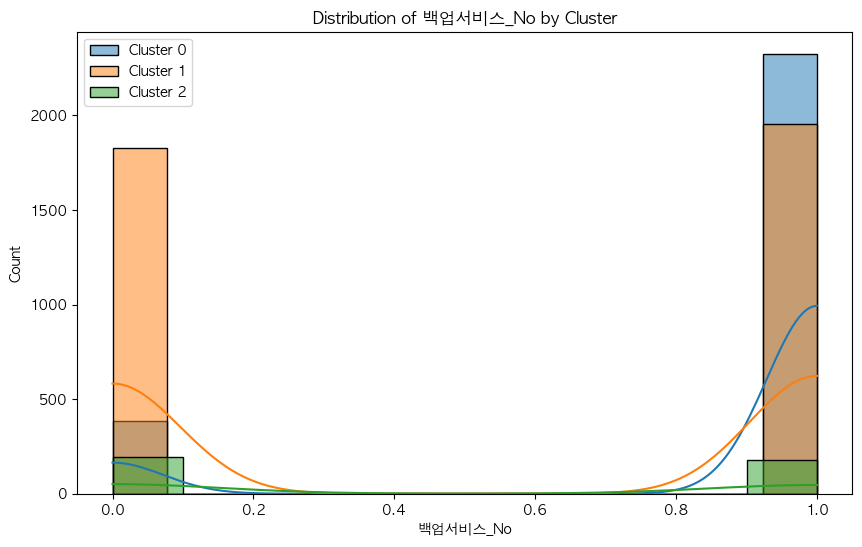

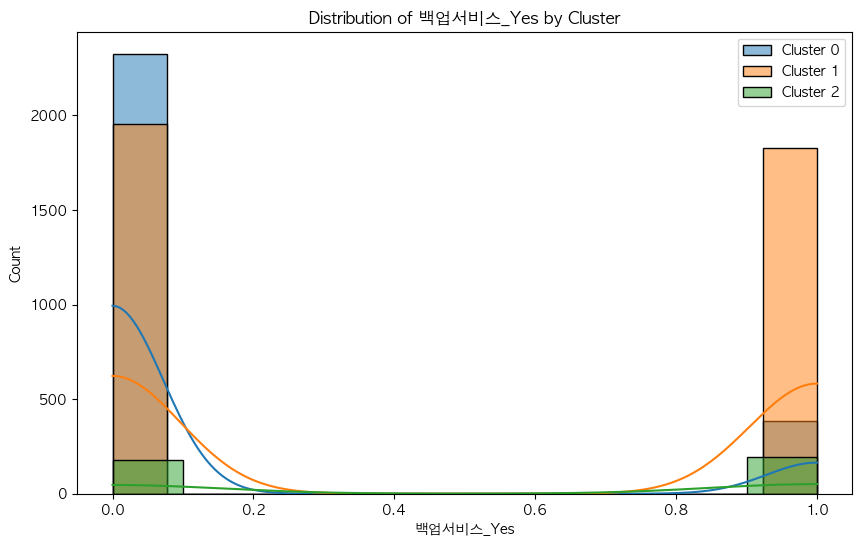

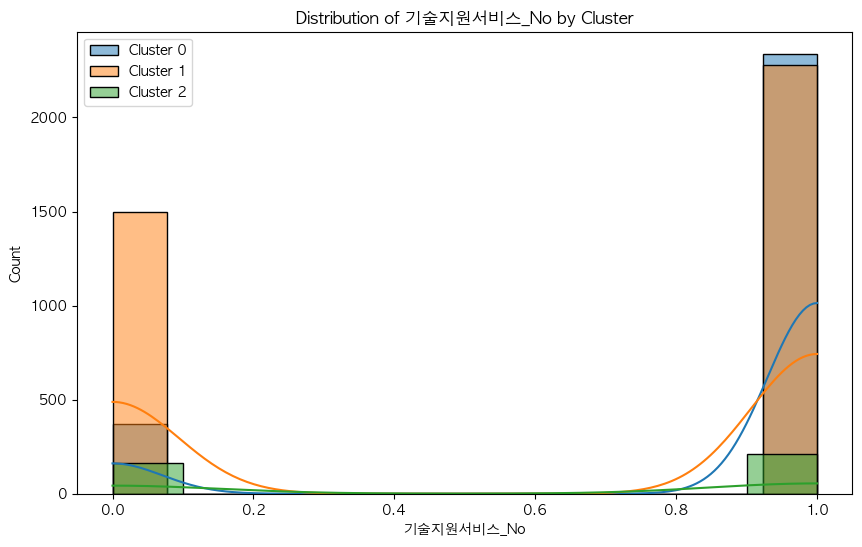

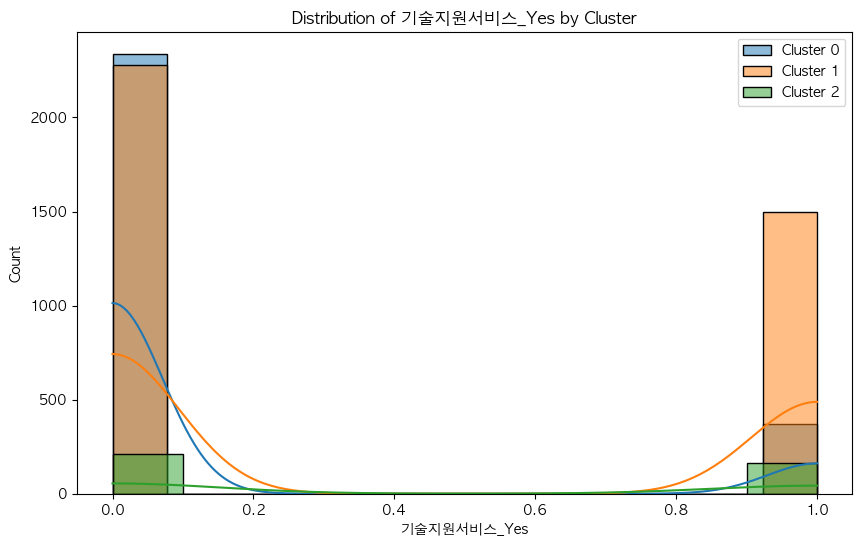

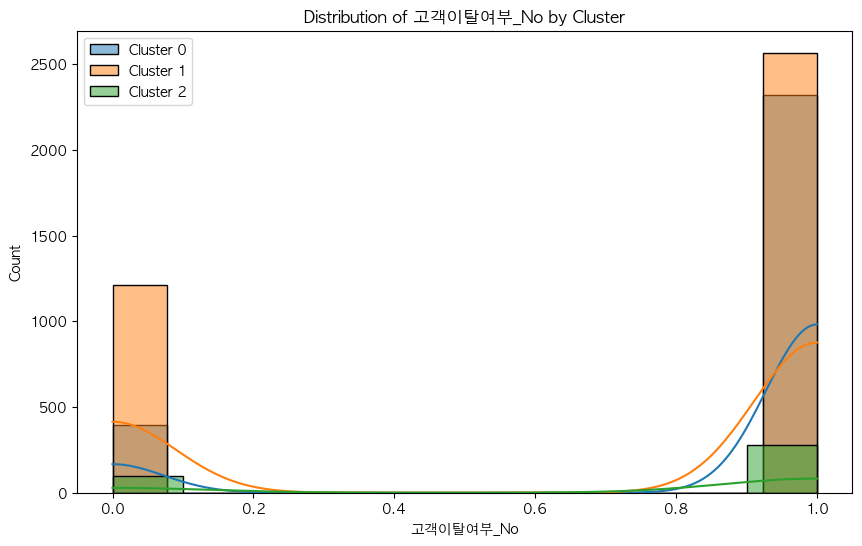

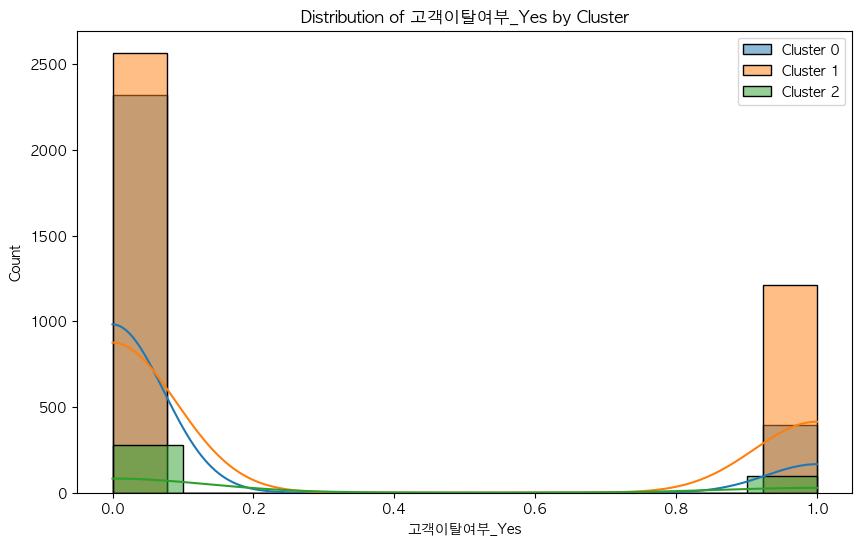

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


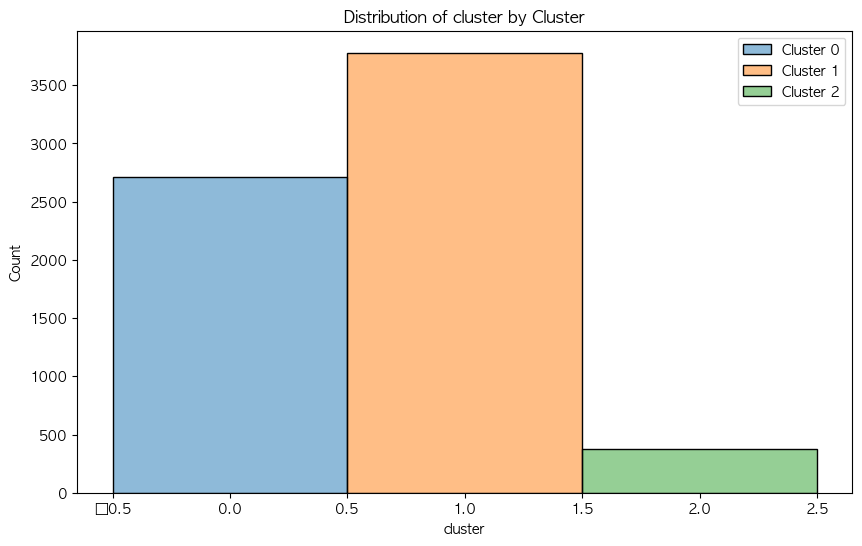

In [74]:
# 히스토그램을 사용한 변수별 분포 시각화
for column in combined_df.columns[:-1]:  # 마지막 두 컬럼은 제외 (군집 결과와 레이블)
    plt.figure(figsize=(10, 6))
    for i in range(3):
        # 각 군집별로 히스토그램 그리기
        sns.histplot(combined_df[combined_df['cluster_label'] == i][column], kde=True, label=f'Cluster {i}')
    plt.title(f'Distribution of {column} by Cluster')
    plt.legend()
    plt.show()

In [66]:
df2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무',
       '부양자수', '추천횟수', '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스',
       '데이터무제한', '데이터사용량', '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유',
       'LTV', '만족도', '데이터사용료', '로밍사용료', '총로밍요금', '연령대', '로밍사용여부', '유지일',
       '총과금액', '과금횟수', '평균과금액', 'Cluster'],
      dtype='object')

In [75]:
# 결혼여부는 제외하고 해볼까
# 결혼 안한 사람만
df2['결혼여부'].value_counts()

결혼여부
No     3896
Yes    2967
Name: count, dtype: int64

In [77]:
df2[df2['결혼여부']=='No']['부양자유무'].value_counts()

부양자유무
No     3588
Yes     308
Name: count, dtype: int64

In [79]:
df2[df2['부양자수']==0]['결혼여부'].value_counts()

결혼여부
No     3588
Yes    1822
Name: count, dtype: int64

In [80]:
df2[df2['부양자수']==0]['연령대'].value_counts()

연령대
20대       1132
40대        947
30대        924
50대        909
60대        801
70대 이상     697
Name: count, dtype: int64

In [83]:
df3 = df2[df2['결혼여부']=='No']
df3 = df3.dropna()

In [85]:
df3.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '고객ID', '성별', '연령', '결혼여부', '부양자유무',
       '부양자수', '추천횟수', '영수증발급여부', '과금방식', '보안서비스', '백업서비스', '기술지원서비스',
       '데이터무제한', '데이터사용량', '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형', '이탈사유',
       'LTV', '만족도', '데이터사용료', '로밍사용료', '총로밍요금', '연령대', '로밍사용여부', '유지일',
       '총과금액', '과금횟수', '평균과금액', 'Cluster'],
      dtype='object')

In [89]:
from sklearn.impute import SimpleImputer

In [93]:
# 원-핫 인코더 생성
encoder = OneHotEncoder(sparse=False)

# 범주형 변수를 선택하여 원-핫 인코딩 수행
categorical_cols = ['부양자유무','보안서비스','백업서비스', 
                    '기술지원서비스','고객이탈여부']
categorical_data_encoded = encoder.fit_transform(df3[categorical_cols])

# 원-핫 인코딩 결과를 DataFrame으로 변환
categorical_df = pd.DataFrame(categorical_data_encoded,
                              columns=encoder.get_feature_names_out(categorical_cols))

# 수치형 변수의 컬럼 이름을 리스트로 지정
numerical_cols = ['추천횟수','데이터사용량','데이터사용료',
                  '평균과금액','유지일']

# 누락된 값을 평균으로 채우기 위한 Imputer 생성
imputer = SimpleImputer(strategy='mean')

# 수치형 데이터에만 imputer 적용
numerical_df = pd.DataFrame(imputer.fit_transform(df3[numerical_cols]), columns=numerical_cols)

# 범주형 데이터는 이미 원-핫 인코딩 되었으므로 NaN 값이 없을 것으로 가정
combined_df = pd.concat([numerical_df, categorical_df], axis=1)

# 군집 분석 수행
for i in [2, 3, 4, 5]:
    cluster_n = KMeans(n_clusters=i, random_state=42)
    n_target = cluster_n.fit_predict(combined_df)
    silhouette_avg = silhouette_score(combined_df, n_target)
    print(f'{i} 군집에서 실루엣 값: {silhouette_avg}')

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 군집에서 실루엣 값: 0.7073111140636799
3 군집에서 실루엣 값: 0.6119780984910334
4 군집에서 실루엣 값: 0.5171669304683992
5 군집에서 실루엣 값: 0.5291103756599748


/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [94]:
# 3 군집을 위한 KMeans 모델 생성 및 학습
kmeans = KMeans(n_clusters=2, random_state=42)
combined_df['cluster'] = kmeans.fit_predict(combined_df)

# 군집 레이블을 결과 DataFrame에 추가
combined_df['cluster_label'] = kmeans.labels_

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


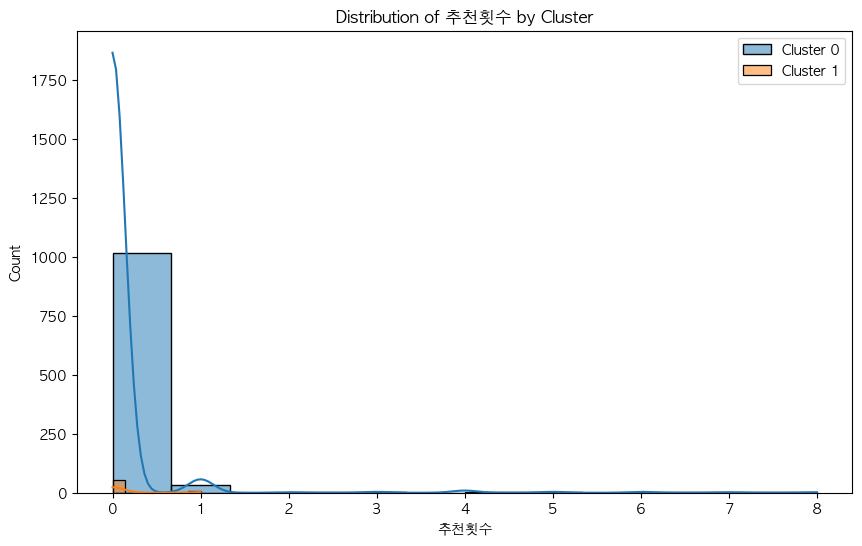

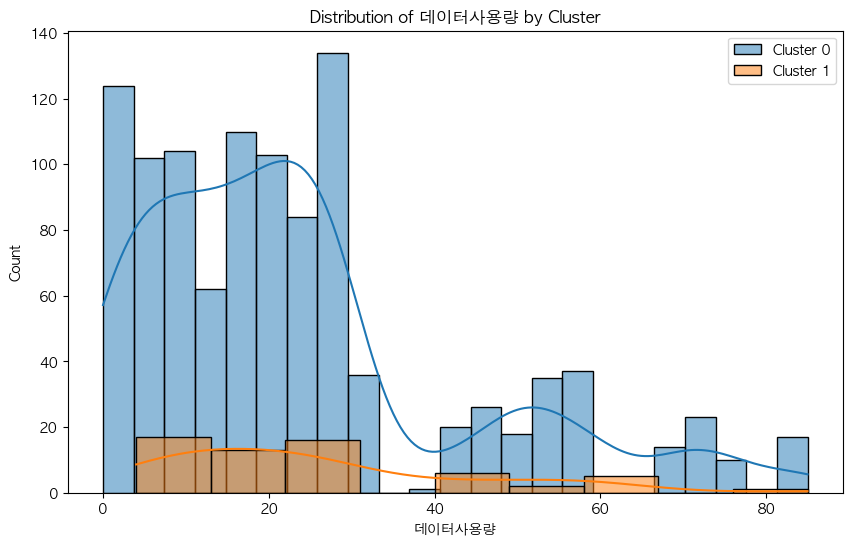

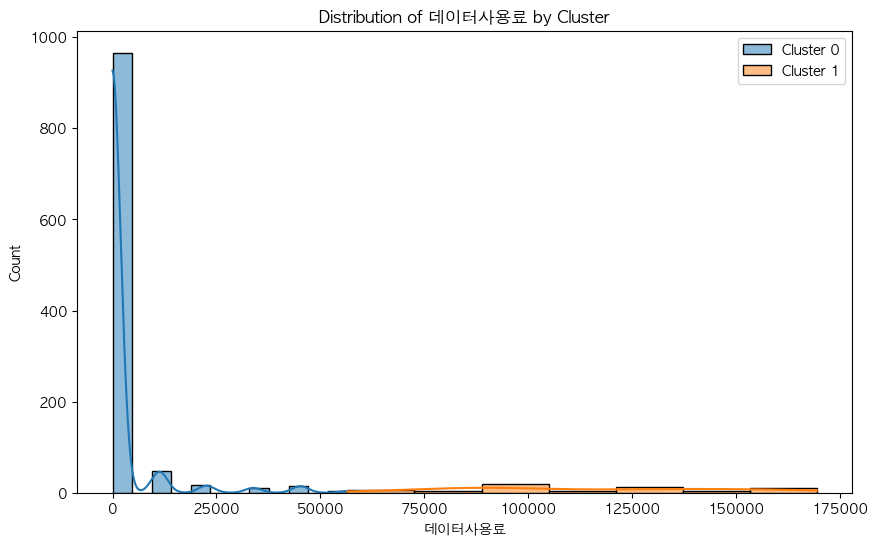

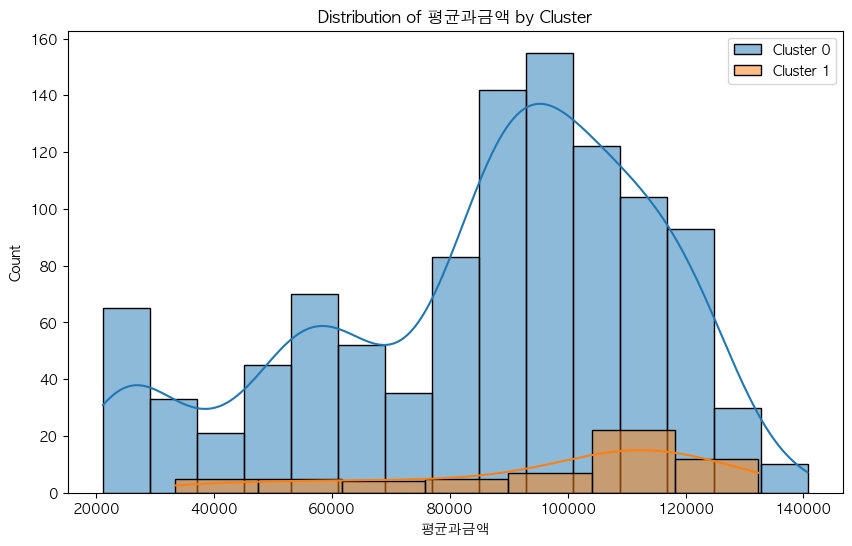

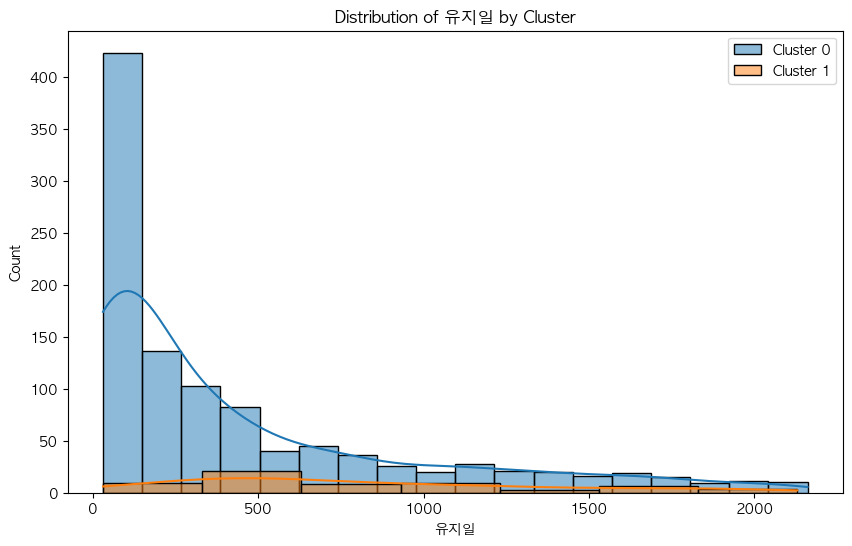

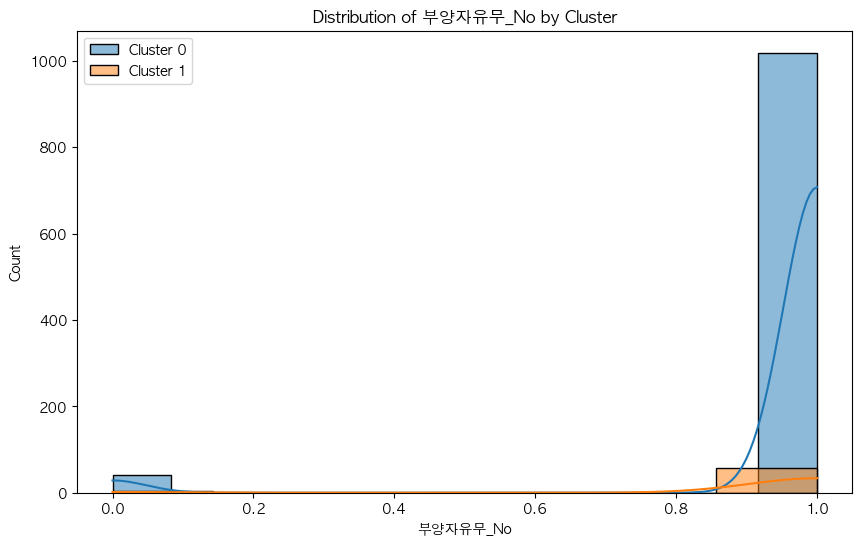

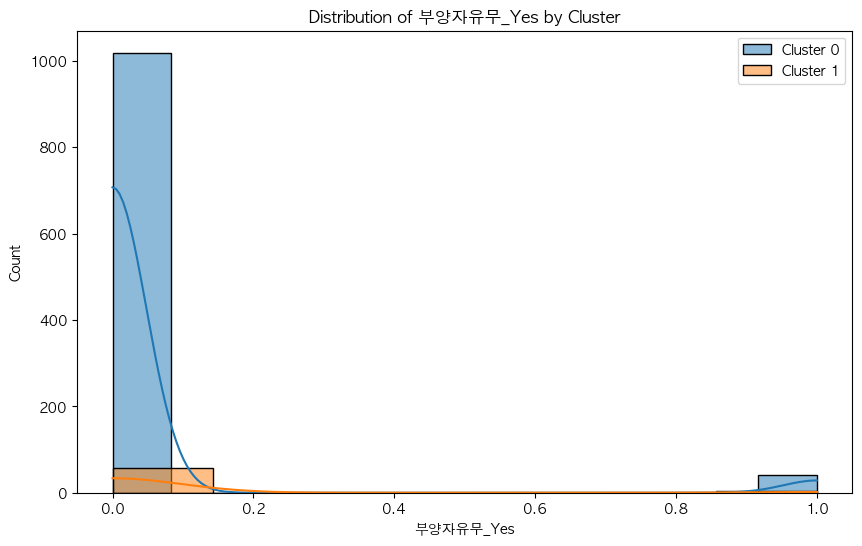

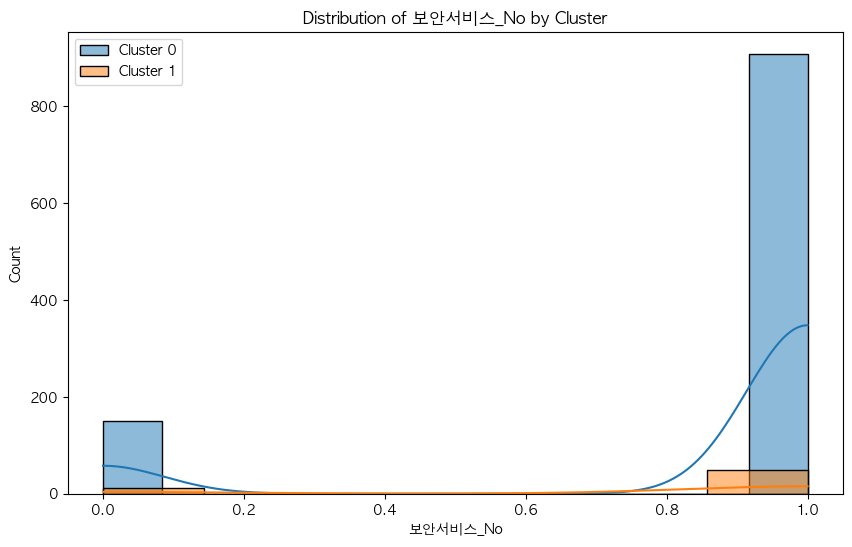

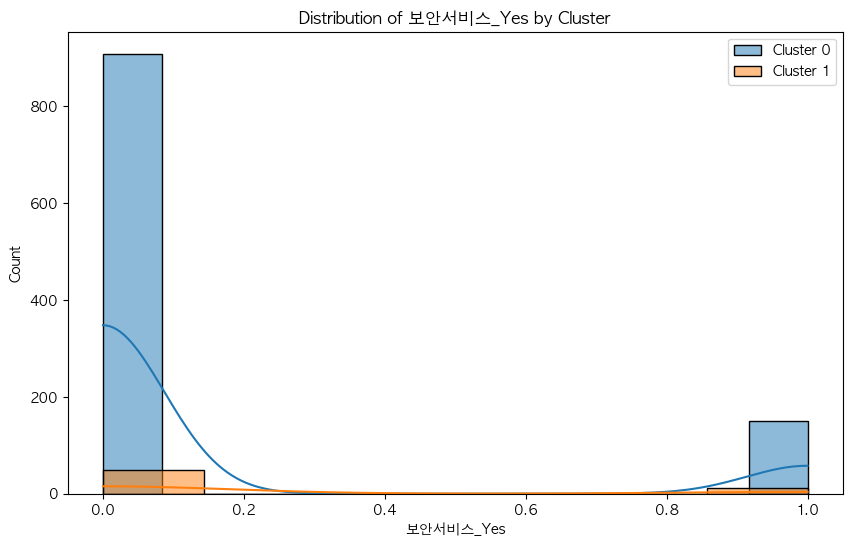

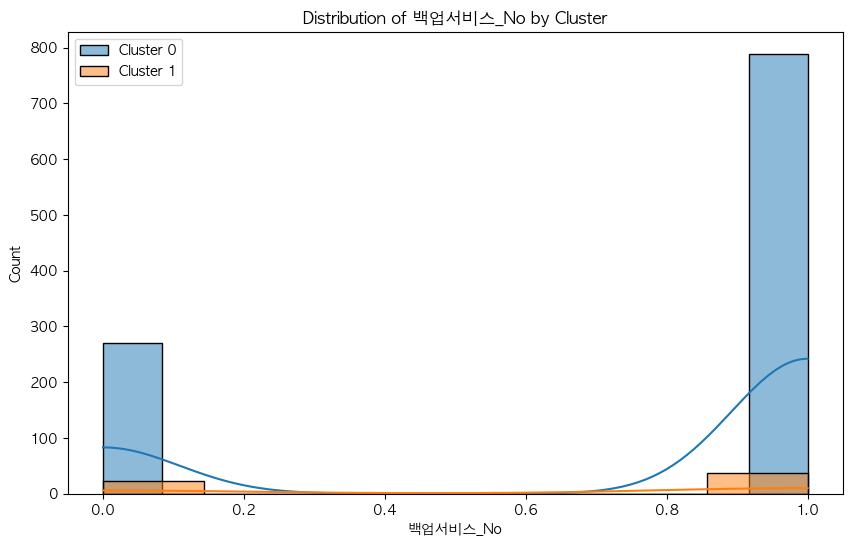

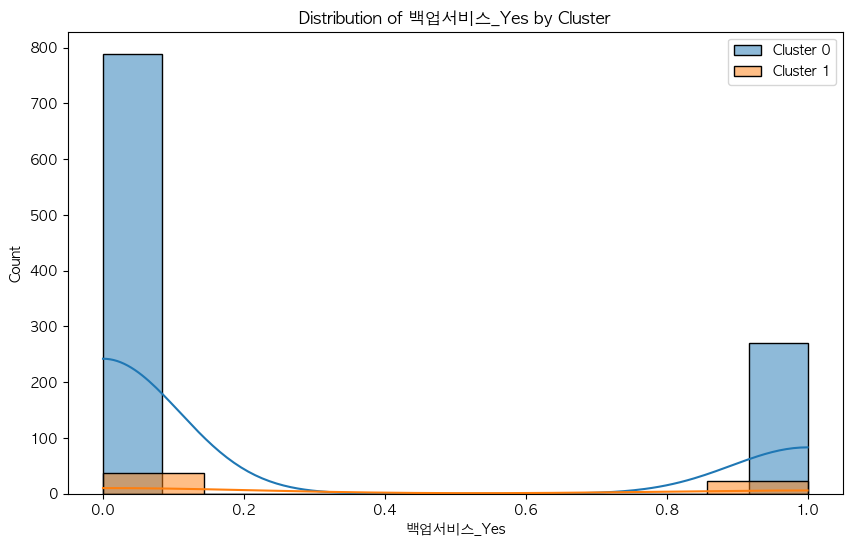

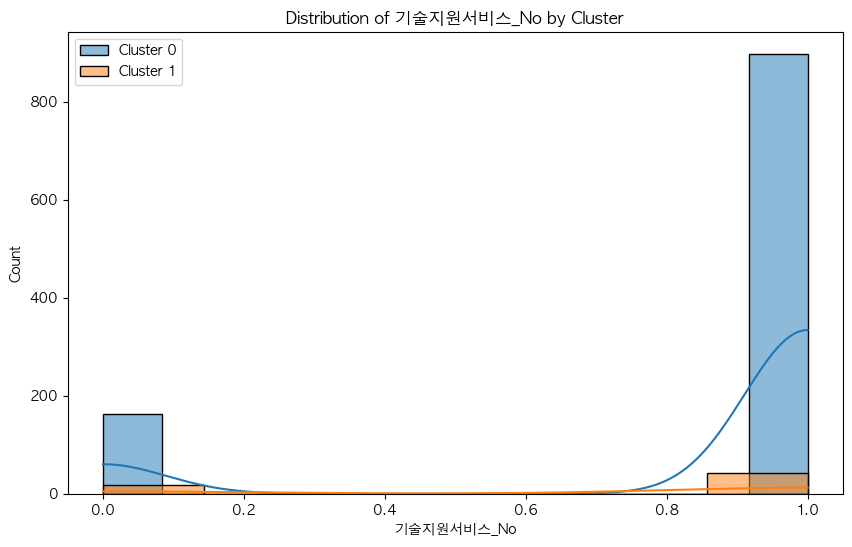

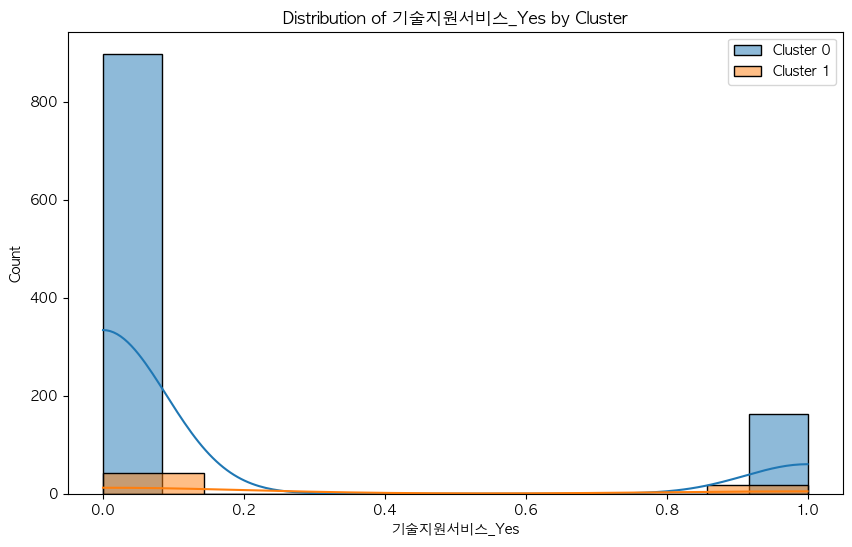

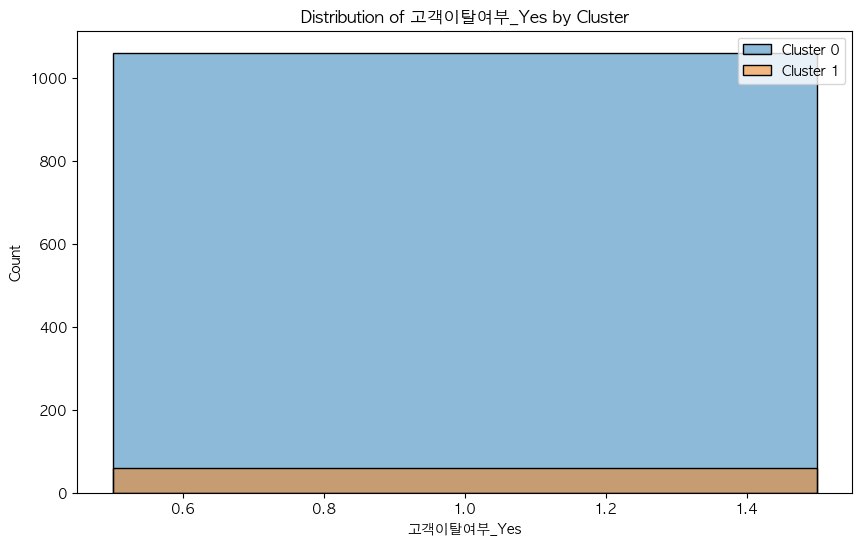

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


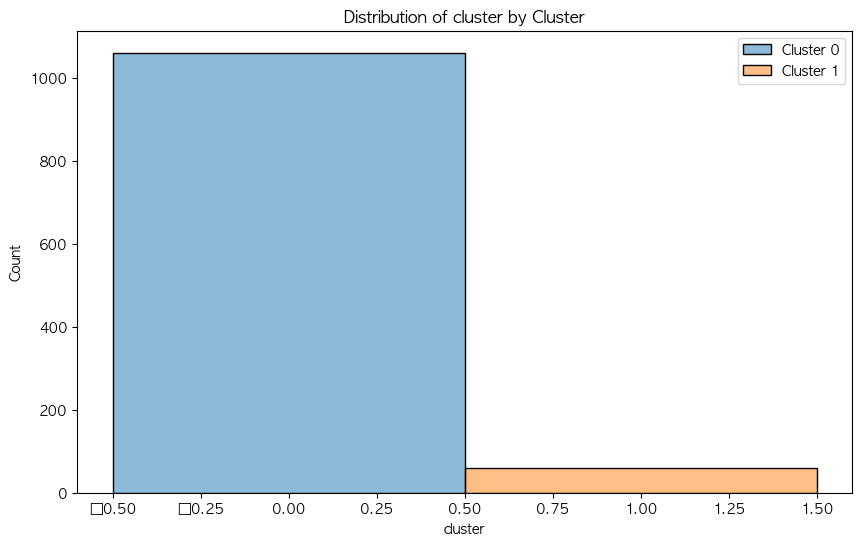

In [96]:
# 히스토그램을 사용한 변수별 분포 시각화
for column in combined_df.columns[:-1]:  # 마지막 두 컬럼은 제외 (군집 결과와 레이블)
    plt.figure(figsize=(10, 6))
    for i in range(2):
        # 각 군집별로 히스토그램 그리기
        sns.histplot(combined_df[combined_df['cluster_label'] == i][column], kde=True, label=f'Cluster {i}')
    plt.title(f'Distribution of {column} by Cluster')
    plt.legend()
    plt.show()

In [97]:
df2

Unnamed: 0.1  Unnamed: 0     고객ID  성별  연령 결혼여부 부양자유무  부양자수  추천횟수  \
0                0           0  C-10001  여성  37  Yes    No     0     2   
1                1           1  C-10002  남성  46   No    No     0     0   
2                2           2  C-10003  남성  50   No    No     0     0   
3                3           3  C-10004  남성  78  Yes    No     0     1   
4                4           4  C-10005  여성  75  Yes    No     0     3   
...            ...         ...      ...  ..  ..  ...   ...   ...   ...   
6858          6858        6858  C-17039  여성  20   No    No     0     0   
6859          6859        6859  C-17040  남성  40  Yes    No     0     1   
6860          6860        6860  C-17041  남성  22   No    No     0     0   
6861          6861        6861  C-17042  남성  21   No    No     0     5   
6862          6862        6862  C-17043  남성  36  Yes    No     0     1   

     영수증발급여부  ... 데이터사용료  로밍사용료   총로밍요금     연령대 로밍사용여부   유지일     총과금액 과금횟수  \
0        Yes  ...      0  47910  431100     30대    미사용   640  1755400   21   
1         No  ...  11300  12090  108710     40대    미사용   640  1447500   21   
2        Yes  ...      0  38080  152100     50대    미사용   123   490900    5   
3        Yes  ...      0  31410  408720  70대 이상    미사용   395  1578400   14   
4        Yes  ...      0   8360   24970  70대 이상    미사용    92   378000    4   
...      ...  ...    ...    ...     ...     ...    ...   ...      ...  ...   
6858      No  ...      0  52770  685680     20대    미사용   762  1610700   25   
6859     Yes  ...      0  18310  402730     40대    미사용   672  2343500   23   
6860     Yes  ...      0  21020   42040     20대    미사용   426   792400   14   
6861      No  ...      0   2370  160460     20대    미사용  2406  6328500   79   
6862      No  ...      0      0       0     30대     사용  2284  5196100   75   

              평균과금액  Cluster  
0      83590.476190        0  
1      68928.571429        0  
2      98180.000000        0  
3     112742.857143        0  
4      94500.000000        0  
...             ...      ...  
6858   64428.000000        2  
6859  101891.304348        0  
6860   56600.000000        2  
6861   80107.594937        2  
6862   69281.333333        0  

[6863 rows x 34 columns]

In [98]:
# 변수별 관계

In [ ]:
df2

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


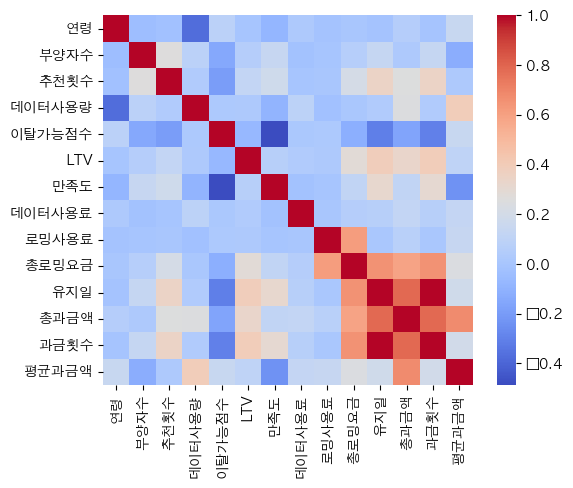

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# 문자열이 포함된 컬럼을 제외하고 상관 관계 매트릭스 계산
numeric_df2 = df2.select_dtypes(include=[np.number])  # 숫자형 데이터만 선택
correlation_matrix = numeric_df2.corr()

# 상관 관계 히트맵 생성
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

In [103]:
df2 = df2.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Cluster'], axis=1)

In [104]:
df2.columns

Index(['고객ID', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '추천횟수', '영수증발급여부', '과금방식',
       '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량', '시작일', '종료일', '고객이탈여부',
       '이탈가능점수', '이탈유형', '이탈사유', 'LTV', '만족도', '데이터사용료', '로밍사용료', '총로밍요금',
       '연령대', '로밍사용여부', '유지일', '총과금액', '과금횟수', '평균과금액'],
      dtype='object')

In [107]:
# 범주형 변수 추출
categorical_variables = df2.select_dtypes(include=['object']).columns.tolist()

# 범주형 변수를 더미 변수로 변환
dummy_df = pd.get_dummies(df2[categorical_variables])
# 연속형
numeric_df2 = df2.select_dtypes(include=[np.number])
combined_df = pd.concat([numeric_df2, dummy_df], axis=1)

In [ ]:
correlation_matrix = combined_df.corr()

In [108]:
# 상관 관계 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
plt.show()

KeyboardInterrupt: 

In [109]:
px.histogram(df2['평균과금액'])

In [111]:
px.histogram(one_df['평균과금액'])

In [112]:
px.histogram(notone_df['평균과금액'])

In [115]:
out_df = df2[df2['고객이탈여부']=='Yes']

In [116]:
len(out_df)

1702

In [119]:
out_one_df = out_df[(out_df['결혼여부']=='No') & (out_df['부양자유무']=='No')]

In [120]:
len(out_one_df)

1076

In [121]:
1076/1702

0.6321974148061105

In [122]:
df2

고객ID  성별  연령 결혼여부 부양자유무  부양자수  추천횟수 영수증발급여부  과금방식 보안서비스  ... 만족도  \
0     C-10001  여성  37  Yes    No     0     2     Yes  신용카드    No  ...   3   
1     C-10002  남성  46   No    No     0     0      No  신용카드    No  ...   5   
2     C-10003  남성  50   No    No     0     0     Yes  계좌이체    No  ...   1   
3     C-10004  남성  78  Yes    No     0     1     Yes  계좌이체    No  ...   1   
4     C-10005  여성  75  Yes    No     0     3     Yes  신용카드    No  ...   1   
...       ...  ..  ..  ...   ...   ...   ...     ...   ...   ...  ...  ..   
6858  C-17039  여성  20   No    No     0     0      No  신용카드   Yes  ...   4   
6859  C-17040  남성  40  Yes    No     0     1     Yes  계좌이체    No  ...   1   
6860  C-17041  남성  22   No    No     0     0     Yes  신용카드    No  ...   5   
6861  C-17042  남성  21   No    No     0     5      No  신용카드   Yes  ...   3   
6862  C-17043  남성  36  Yes    No     0     1      No  계좌이체   Yes  ...   3   

     데이터사용료  로밍사용료   총로밍요금     연령대 로밍사용여부   유지일     총과금액 과금횟수          평균과금액  
0         0  47910  431100     30대    미사용   640  1755400   21   83590.476190  
1     11300  12090  108710     40대    미사용   640  1447500   21   68928.571429  
2         0  38080  152100     50대    미사용   123   490900    5   98180.000000  
3         0  31410  408720  70대 이상    미사용   395  1578400   14  112742.857143  
4         0   8360   24970  70대 이상    미사용    92   378000    4   94500.000000  
...     ...    ...     ...     ...    ...   ...      ...  ...            ...  
6858      0  52770  685680     20대    미사용   762  1610700   25   64428.000000  
6859      0  18310  402730     40대    미사용   672  2343500   23  101891.304348  
6860      0  21020   42040     20대    미사용   426   792400   14   56600.000000  
6861      0   2370  160460     20대    미사용  2406  6328500   79   80107.594937  
6862      0      0       0     30대     사용  2284  5196100   75   69281.333333  

[6863 rows x 31 columns]

In [123]:
len(df2)

6863

In [124]:
len(one_df)

3588

In [125]:
3588/6863

0.5228034387294186